In [1]:
# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)


# To build model for prediction
import statsmodels.api as SM
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

import warnings
warnings.filterwarnings("ignore")

In [2]:
# importing the primary dataset
path = 'C:\\Users\\Ishaan Shakti\\Documents\\Great Lakes\\5 - Machine Learning - 1\\Project Work - Coded\\INNHotelsGroup.csv'
INNHotels_Data = pd.read_csv(path)

In [3]:
# copying data to another variable to avoid any changes to original data
data = INNHotels_Data.copy()

## Data Overview

In [5]:
# view the first 5 rows of dataset
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [6]:
# view the last 5 rows of dataset
data.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


In [7]:
# understand the shape of dataset
data.shape

(36275, 19)

In [8]:
# checking for duplicate data
data.duplicated().sum()

0

In [9]:
# checking for missing values
data.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [10]:
# checking the datatypes of columns in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [12]:
# statistical summary of dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


In [21]:
data.describe(include="object").T

,count,unique,top,freq
Booking_ID,36275,36275,INN00001,1
type_of_meal_plan,36275,4,Meal Plan 1,27835
room_type_reserved,36275,7,Room_Type 1,28130
market_segment_type,36275,5,Online,23214
booking_status,36275,2,Not_Canceled,24390


In [23]:
data=data.drop(["Booking_ID"], axis=1)

In [24]:
# function to plot a boxplot and a histogram along the same scale.
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [25]:
# function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [26]:
#function to create stacked barplots
def stacked_barplot(data, predictor, target, perc=False):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
  
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5,))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [27]:
# function to plot distributions wrt target
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

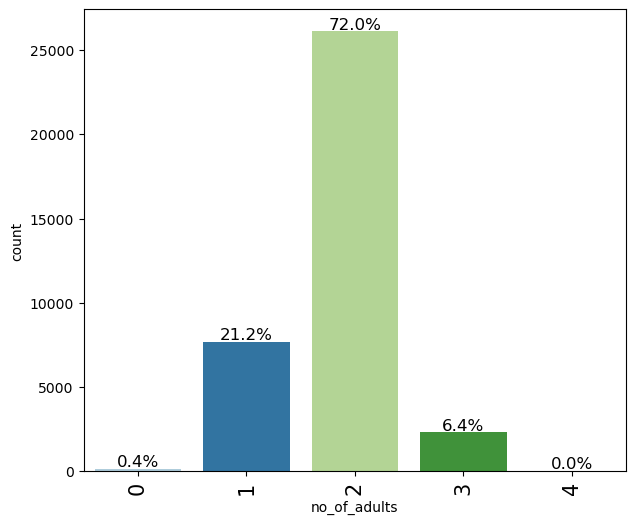

In [28]:
labeled_barplot(data,'no_of_adults', perc=True)

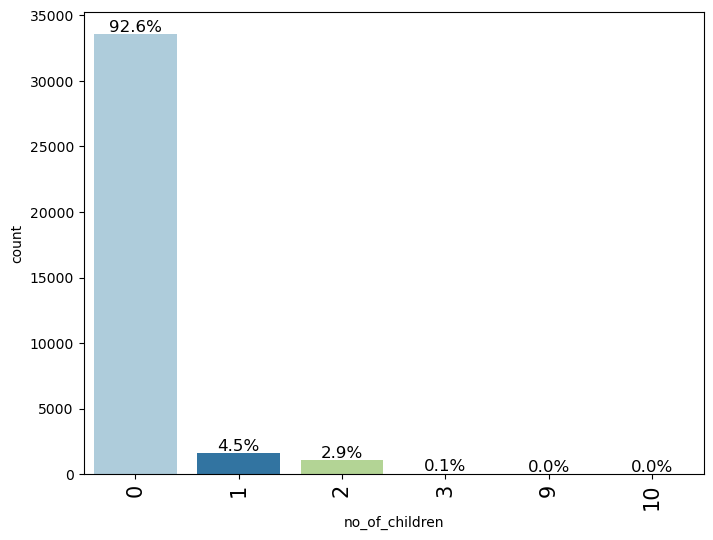

In [29]:
labeled_barplot(data,'no_of_children', perc=True)

In [30]:
data['no_of_children'].value_counts()

no_of_children
0     33577
1      1618
2      1058
3        19
9         2
10        1
Name: count, dtype: int64

In [31]:
data["no_of_children"] = data["no_of_children"].replace([9, 10], 3)

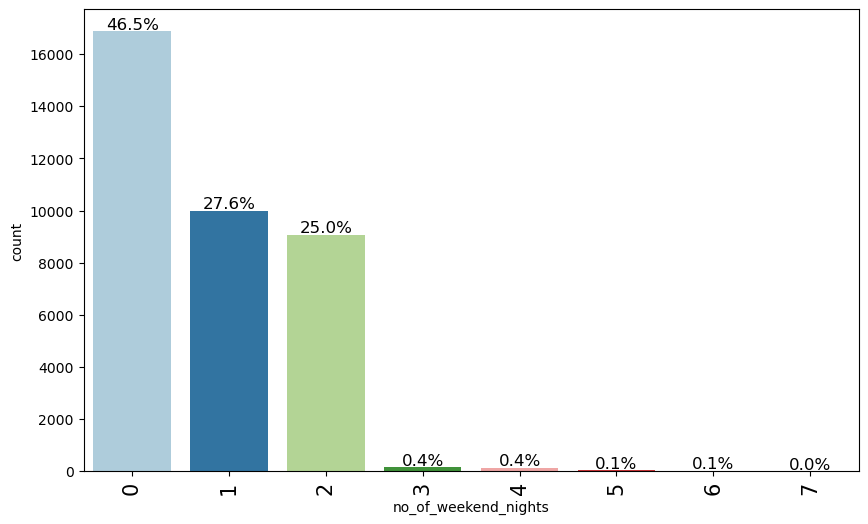

In [32]:
labeled_barplot(data,'no_of_weekend_nights', perc=True)

In [33]:
data['no_of_weekend_nights'].value_counts()

no_of_weekend_nights
0    16872
1     9995
2     9071
3      153
4      129
5       34
6       20
7        1
Name: count, dtype: int64

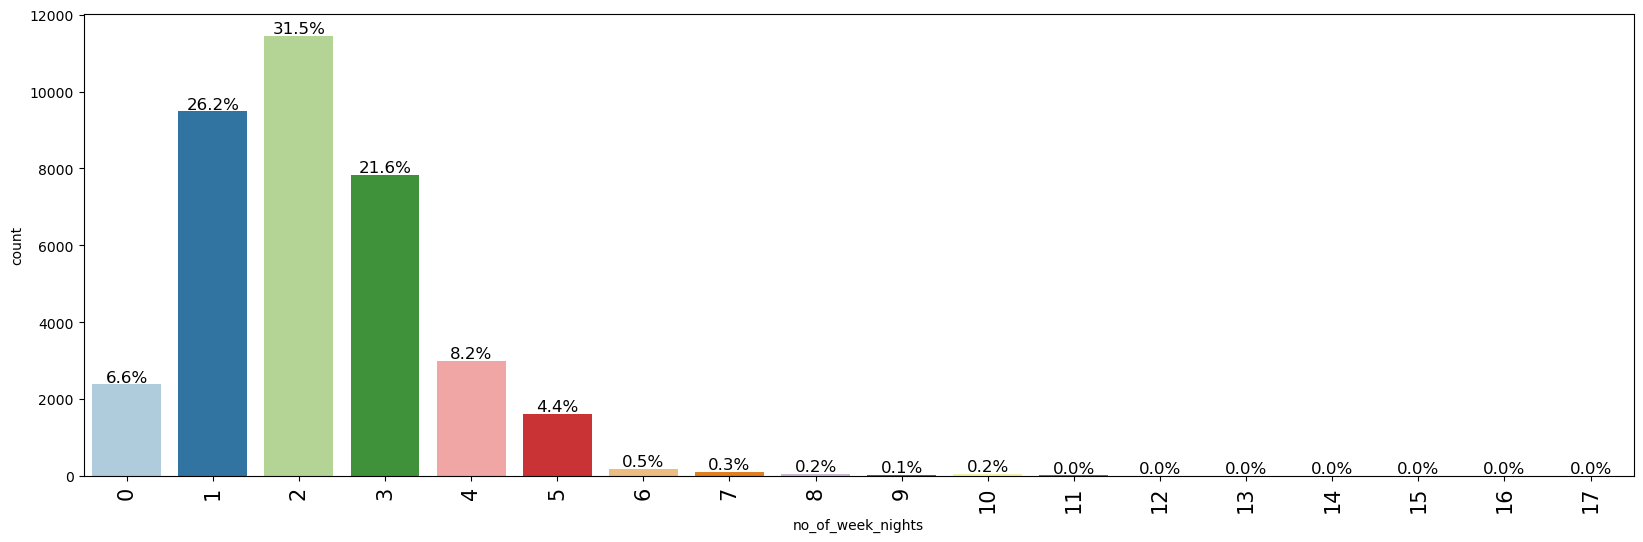

In [34]:
labeled_barplot(data, 'no_of_week_nights', perc=True)

In [35]:
data['no_of_week_nights'].value_counts()

no_of_week_nights
2     11444
1      9488
3      7839
4      2990
0      2387
5      1614
6       189
7       113
10       62
8        62
9        34
11       17
15       10
12        9
14        7
13        5
17        3
16        2
Name: count, dtype: int64

In [36]:
data["no_of_week_nights"] = data["no_of_week_nights"].replace([11,15,12,14,13,17,16], 9)

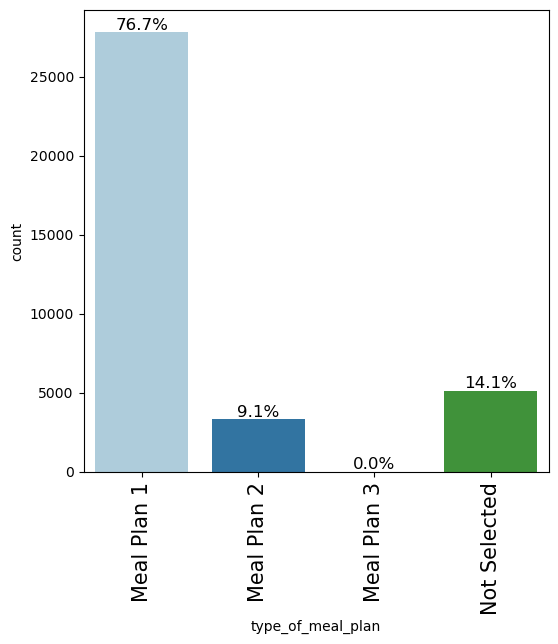

In [37]:
labeled_barplot(data,'type_of_meal_plan', perc=True)

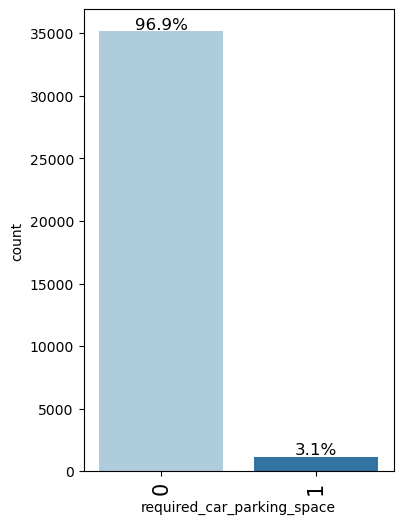

In [38]:
labeled_barplot(data,'required_car_parking_space', perc=True)

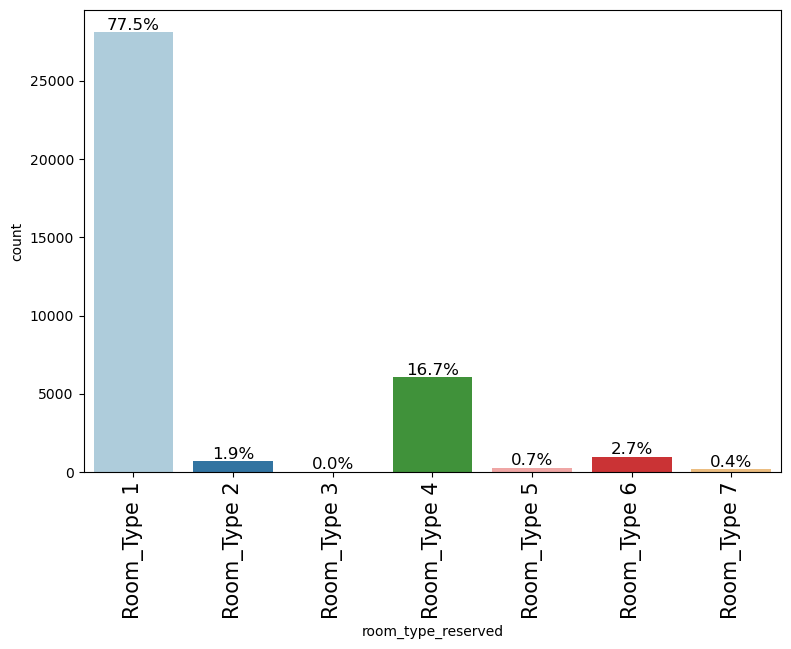

In [39]:
labeled_barplot(data,'room_type_reserved', perc=True)

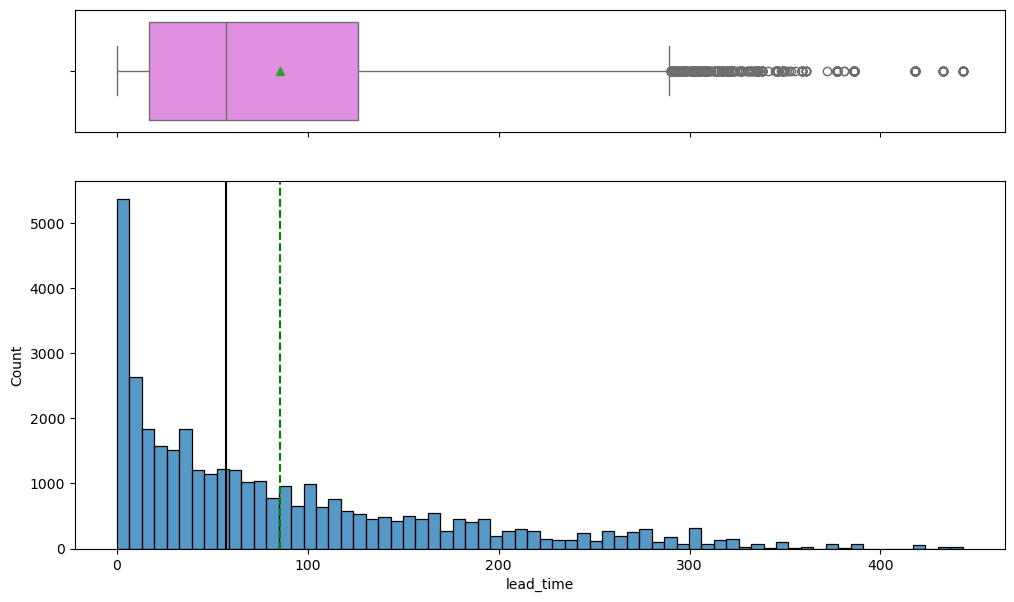

In [40]:
histogram_boxplot(data,'lead_time')

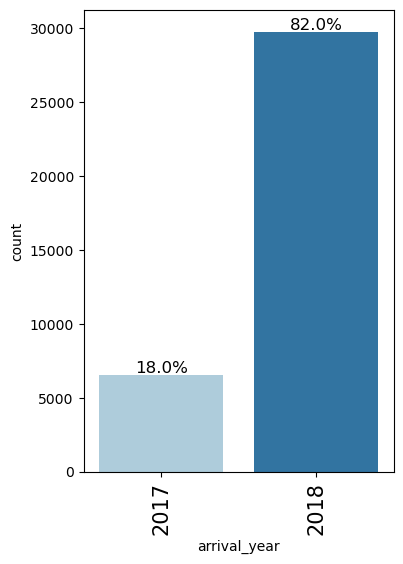

In [41]:
labeled_barplot(data,'arrival_year', perc=True)

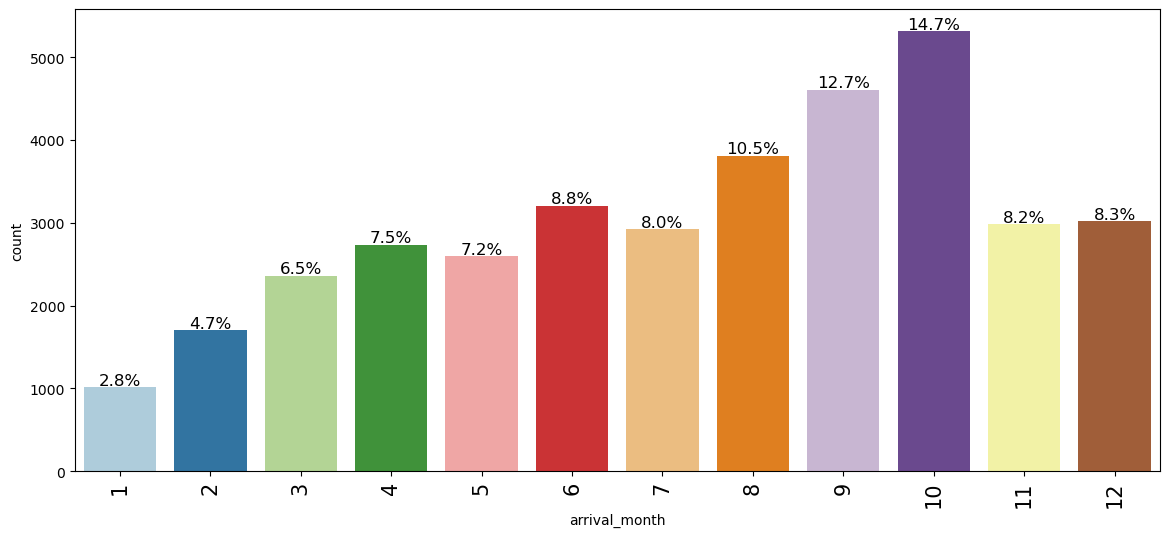

In [42]:
labeled_barplot(data,'arrival_month', perc=True)

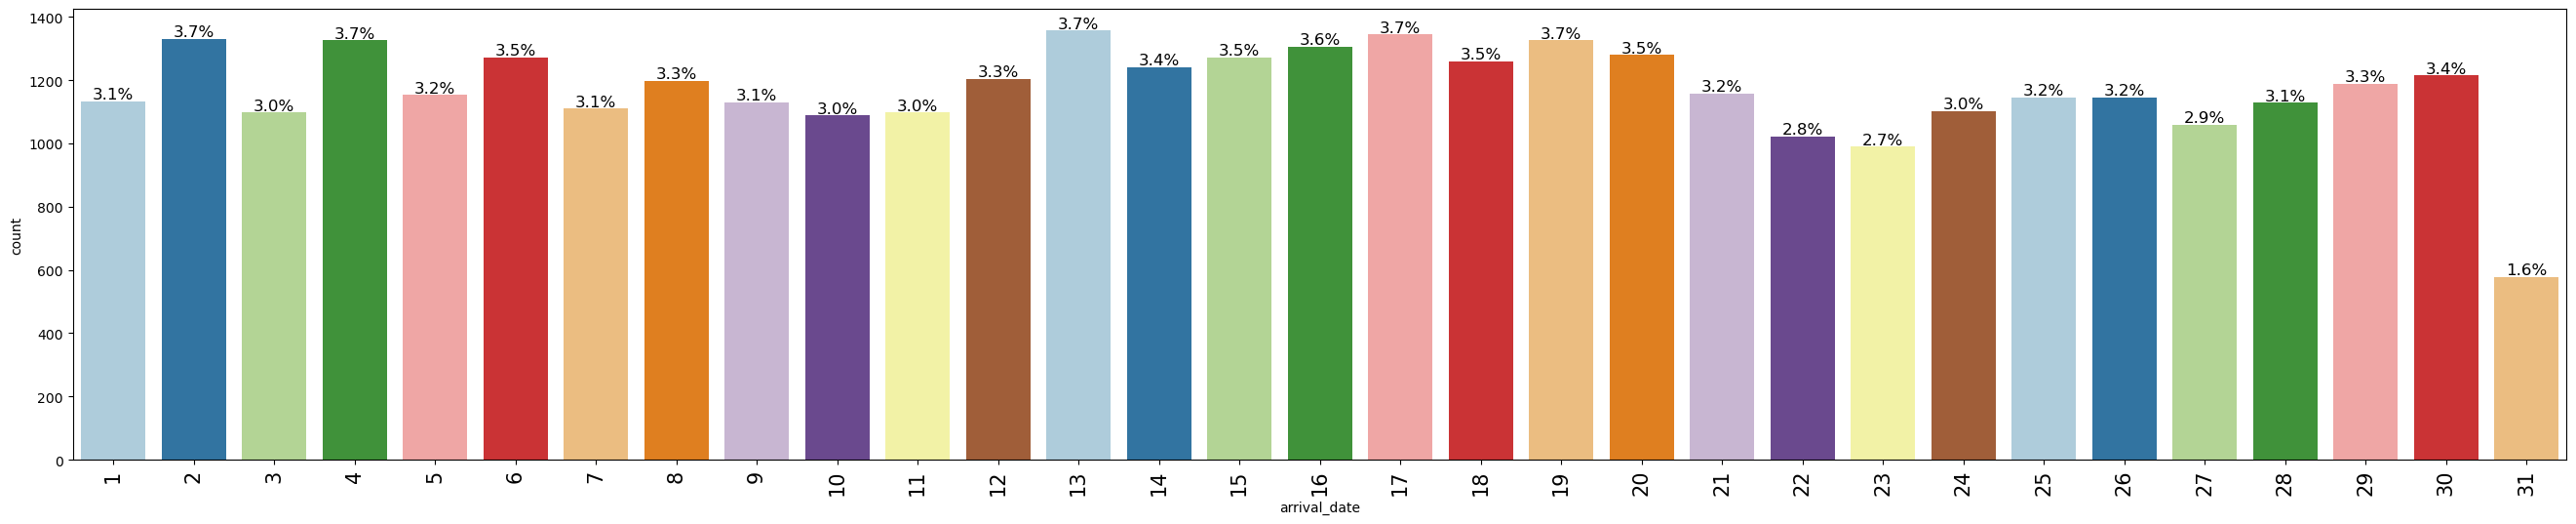

In [43]:
labeled_barplot(data,'arrival_date', perc=True)

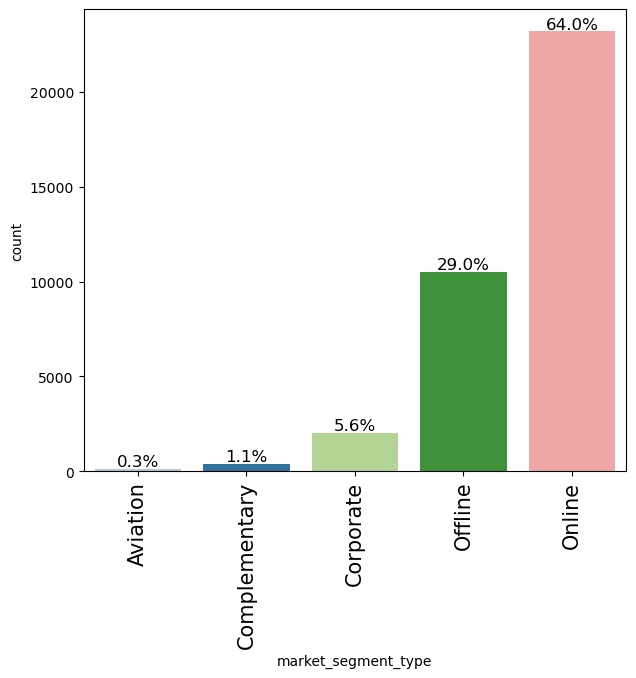

In [44]:
labeled_barplot(data,'market_segment_type', perc=True)

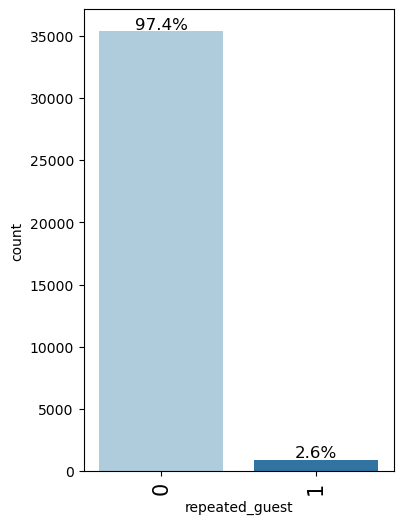

In [45]:
labeled_barplot(data,'repeated_guest', perc=True)

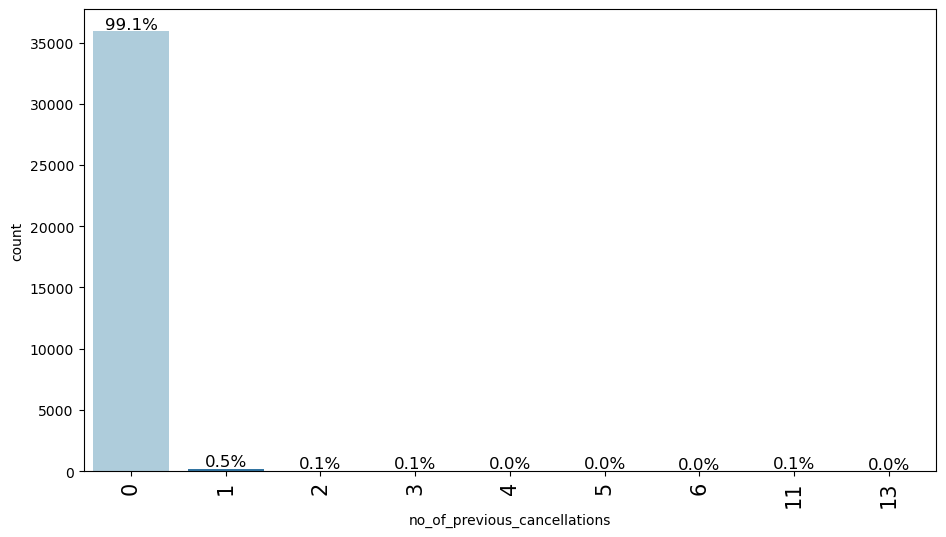

In [46]:
labeled_barplot(data,'no_of_previous_cancellations', perc=True)

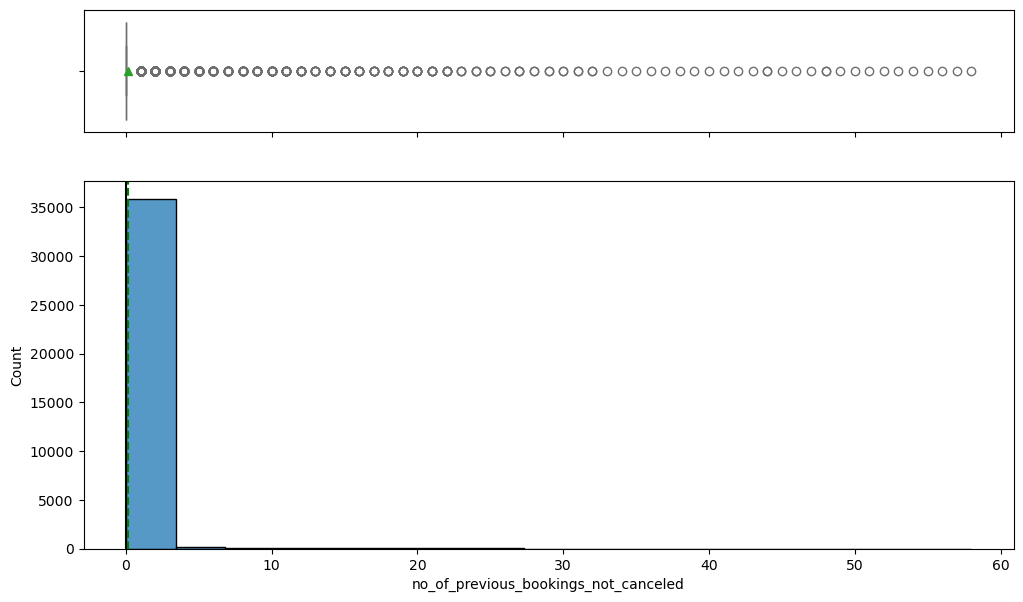

In [47]:
histogram_boxplot(data, "no_of_previous_bookings_not_canceled")

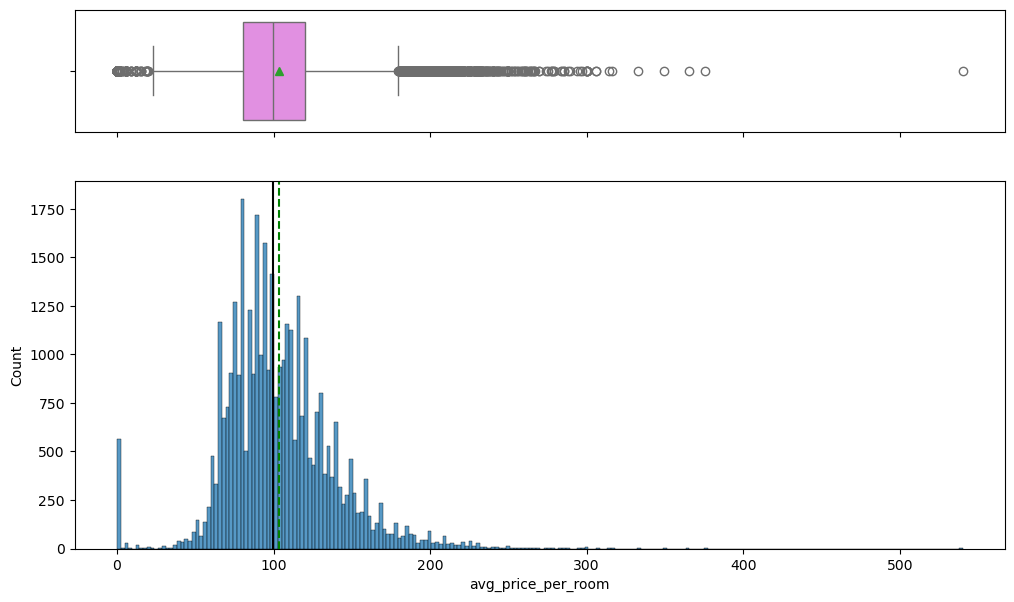

In [48]:
histogram_boxplot(data,'avg_price_per_room')

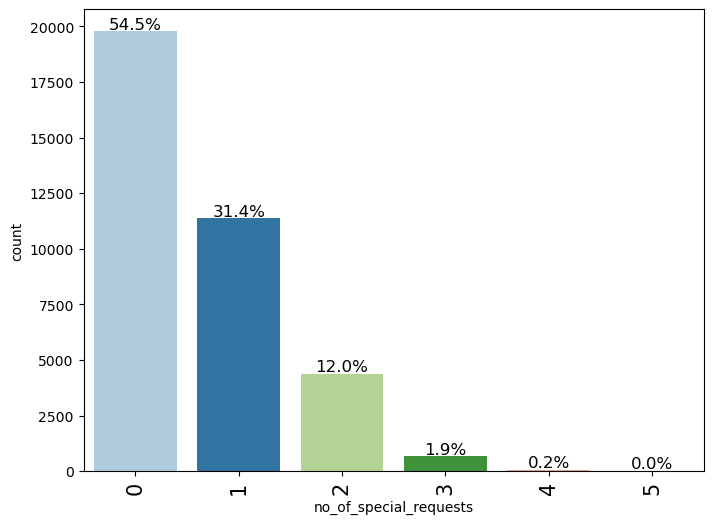

In [49]:
labeled_barplot(data,'no_of_special_requests', perc=True)

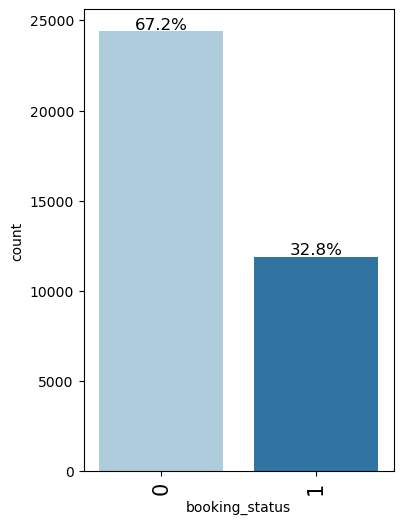

In [50]:
data['booking_status'] = data["booking_status"].apply(lambda x: 0 if x =='Not_Canceled' else 1)
labeled_barplot(data,'booking_status', perc=True)

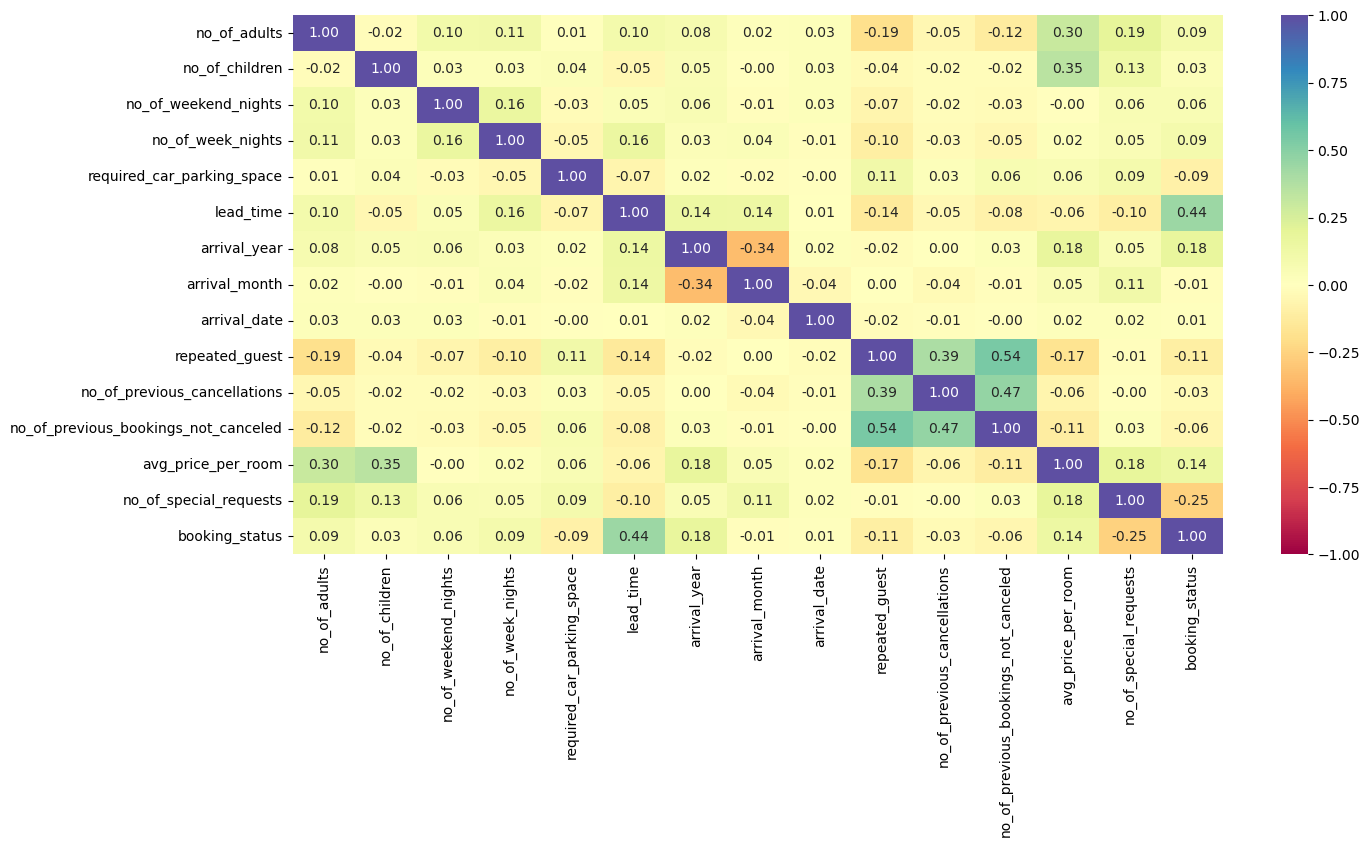

In [51]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(15, 7))
sns.heatmap(data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

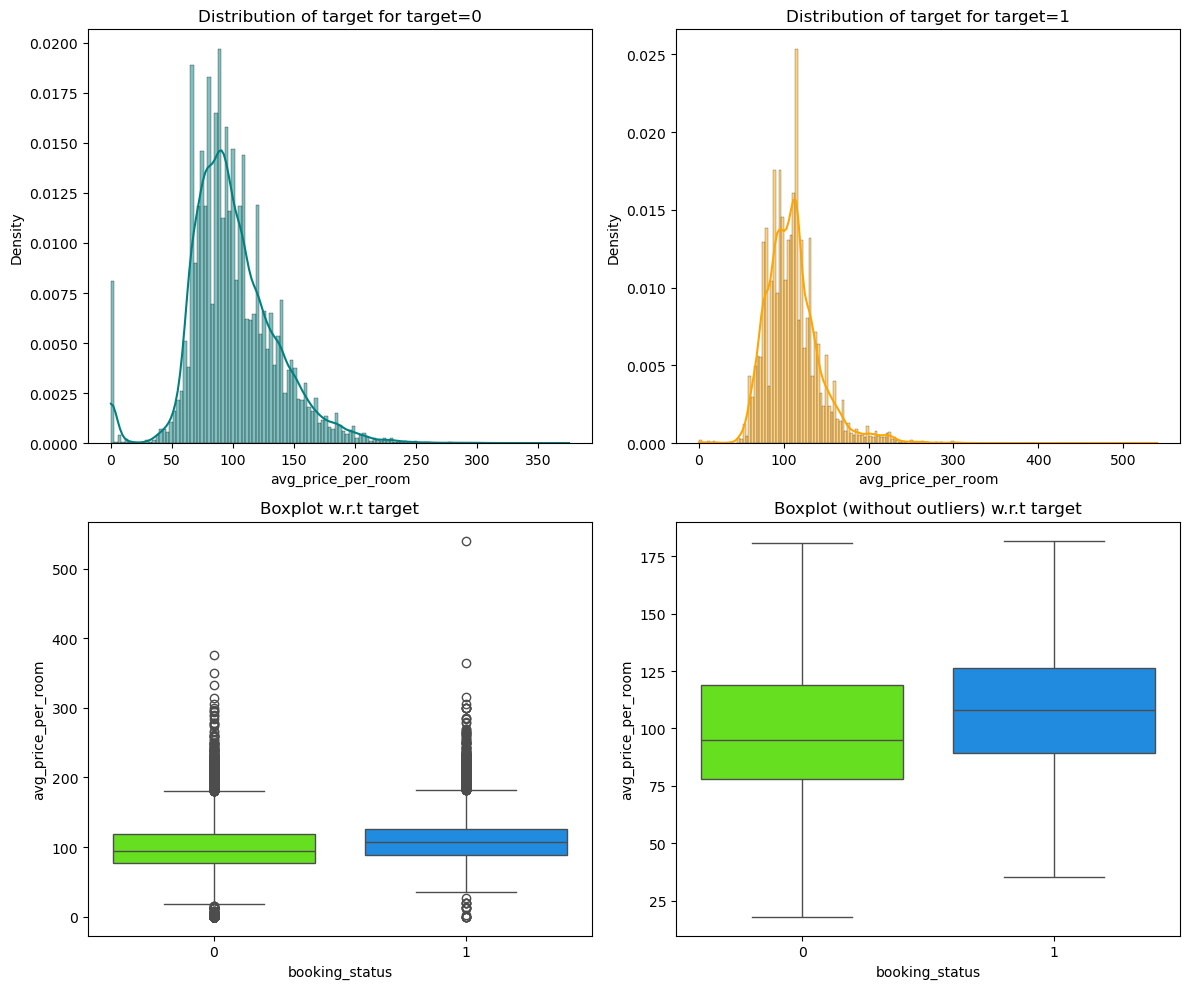

In [52]:
distribution_plot_wrt_target(data, "avg_price_per_room", "booking_status")

booking_status         0     1    All
no_family_members                    
All                18456  9985  28441
2                  15506  8213  23719
3                   2425  1368   3793
4                    514   398    912
5                     11     6     17
------------------------------------------------------------------------------------------------------------------------


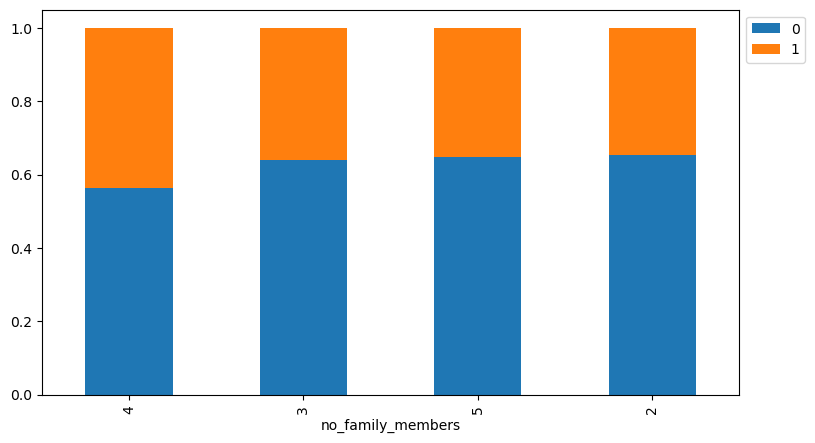

In [53]:
family = data[(data["no_of_children"] >=0) & (data["no_of_adults"] >1)]
family["no_family_members"] = (family["no_of_adults"] + family["no_of_children"])
stacked_barplot(family,"no_family_members","booking_status" )

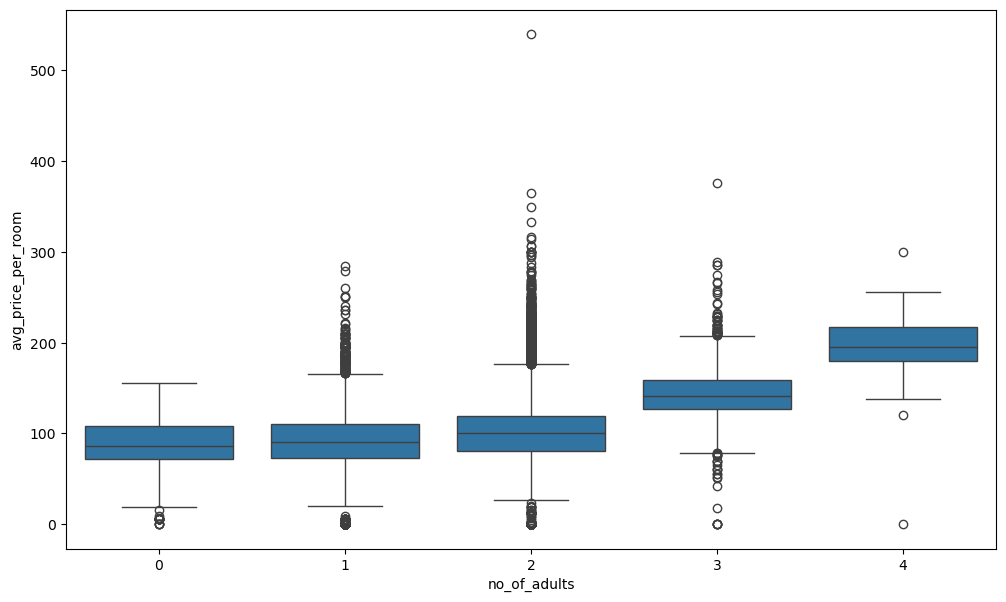

In [54]:
plt.figure(figsize=(12, 7))
sns.boxplot(data, x="no_of_adults", y="avg_price_per_room")
plt.show()

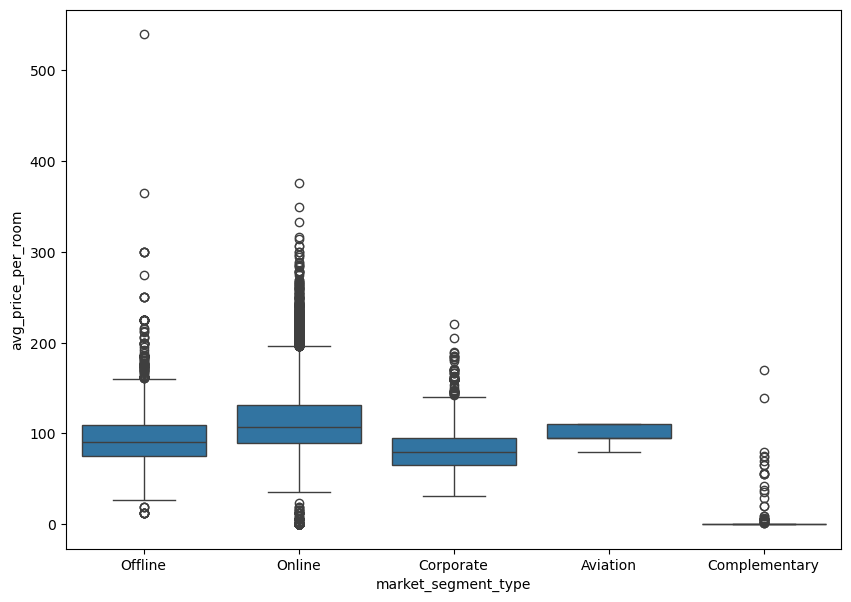

In [55]:
plt.figure(figsize=(10, 7))
sns.boxplot(data, x="market_segment_type", y="avg_price_per_room")
plt.show()

booking_status           0      1    All
market_segment_type                     
All                  24390  11885  36275
Online               14739   8475  23214
Offline               7375   3153  10528
Corporate             1797    220   2017
Aviation                88     37    125
Complementary          391      0    391
------------------------------------------------------------------------------------------------------------------------


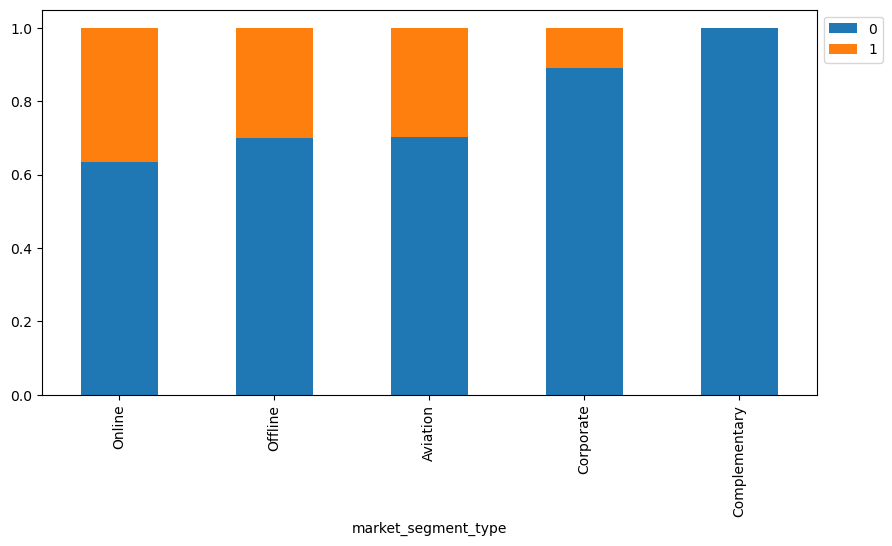

In [56]:
stacked_barplot(data, "market_segment_type", "booking_status")

booking_status      0      1    All
repeated_guest                     
All             24390  11885  36275
0               23476  11869  35345
1                 914     16    930
------------------------------------------------------------------------------------------------------------------------


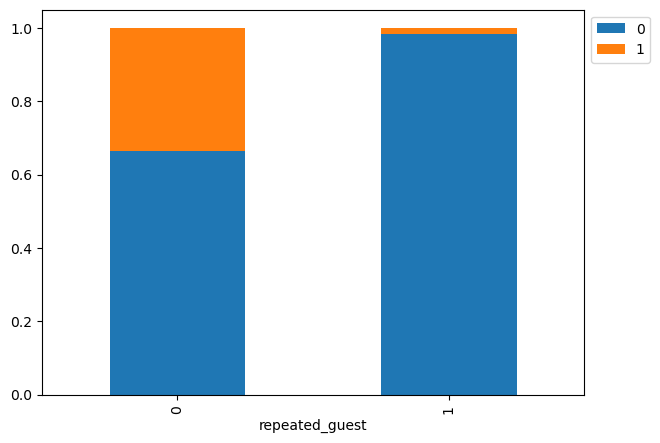

In [57]:
stacked_barplot(data, "repeated_guest", "booking_status")

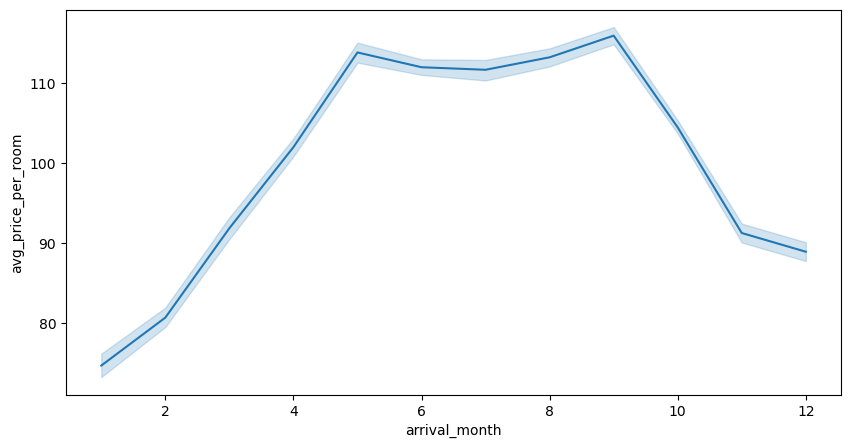

In [58]:
plt.figure(figsize=(10, 5))
sns.lineplot(data = data,x="arrival_month",y="avg_price_per_room")
plt.show()

booking_status              0      1    All
no_of_special_requests                     
All                     24390  11885  36275
0                       11232   8545  19777
1                        8670   2703  11373
2                        3727    637   4364
3                         675      0    675
4                          78      0     78
5                           8      0      8
------------------------------------------------------------------------------------------------------------------------


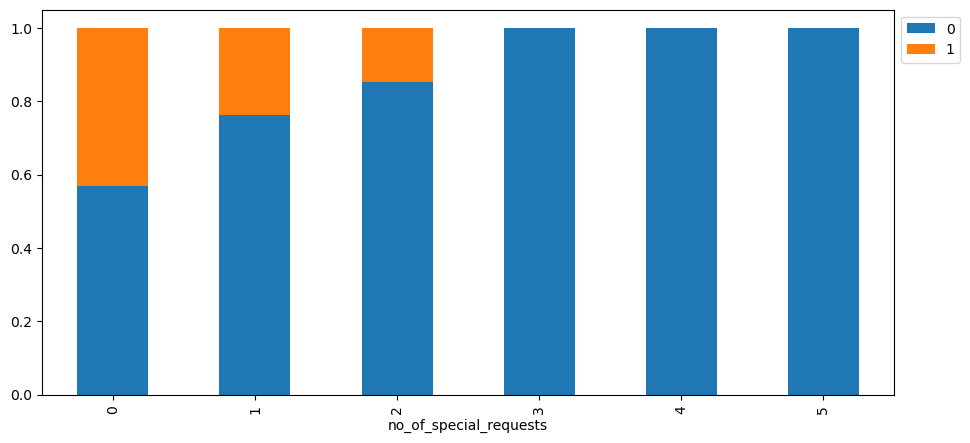

In [59]:
stacked_barplot(data, "no_of_special_requests", "booking_status")

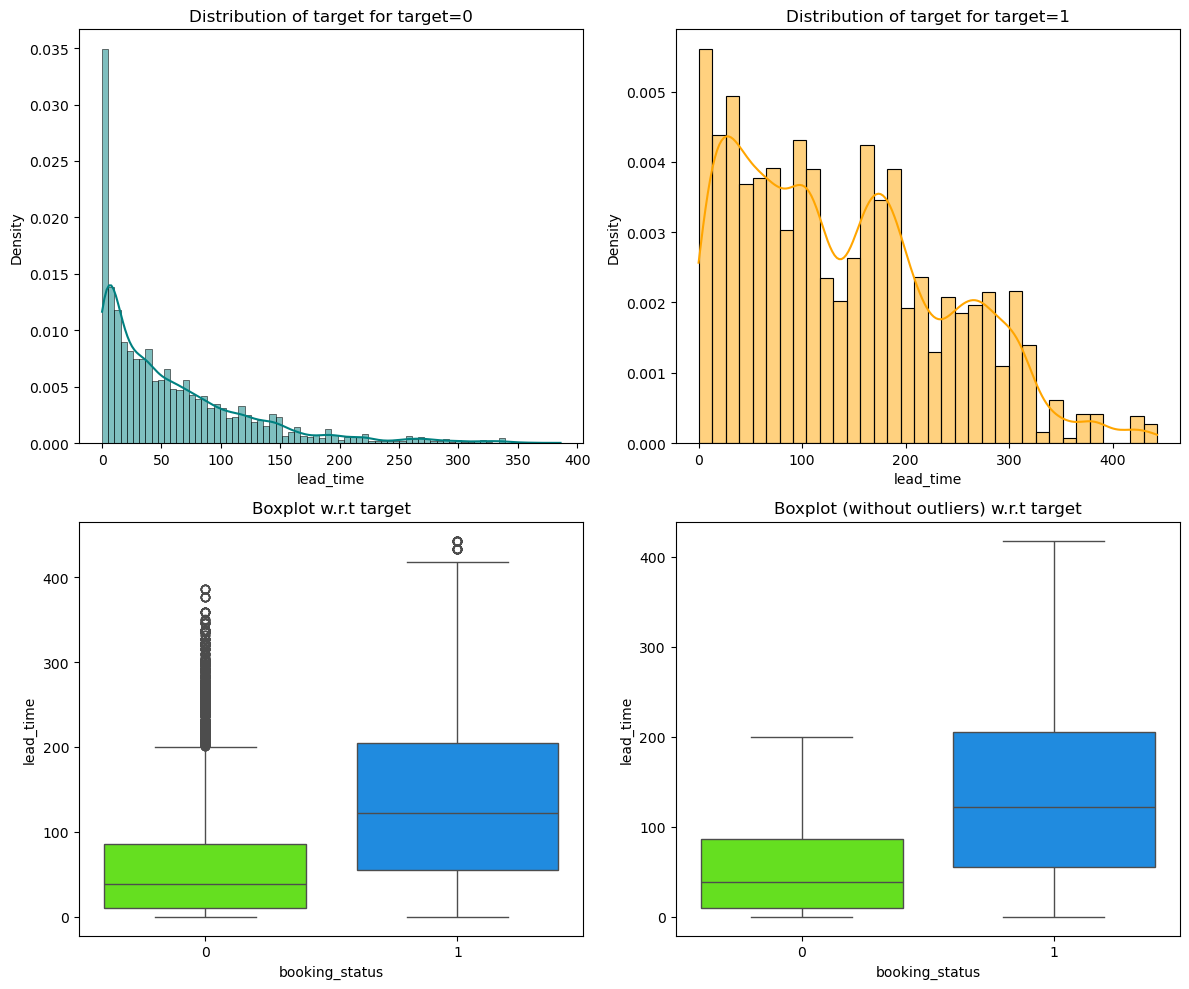

In [60]:
distribution_plot_wrt_target(data, "lead_time", "booking_status")

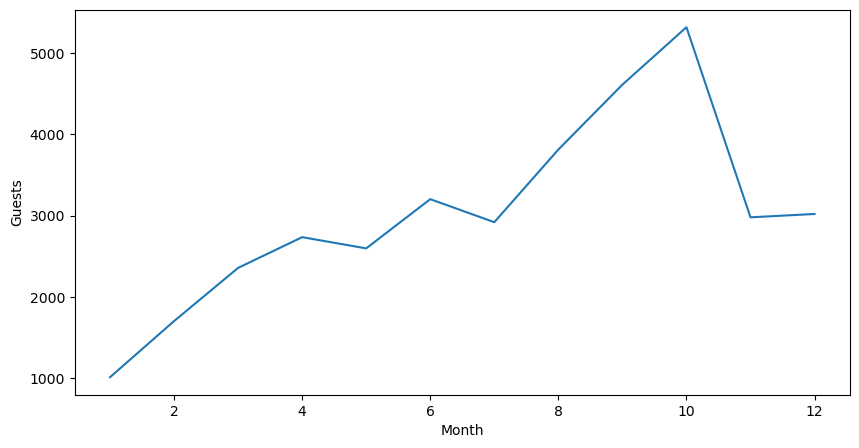

In [61]:
#1.	What are the busiest months in the hotel?
# grouping the data on arrival months and extracting the count of bookings
monthly_data = data.groupby(["arrival_month"])["booking_status"].count()
monthly_data = pd.DataFrame({"Month": list(monthly_data.index), "Guests": list(monthly_data.values)})
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_data, x="Month", y="Guests")
plt.show()

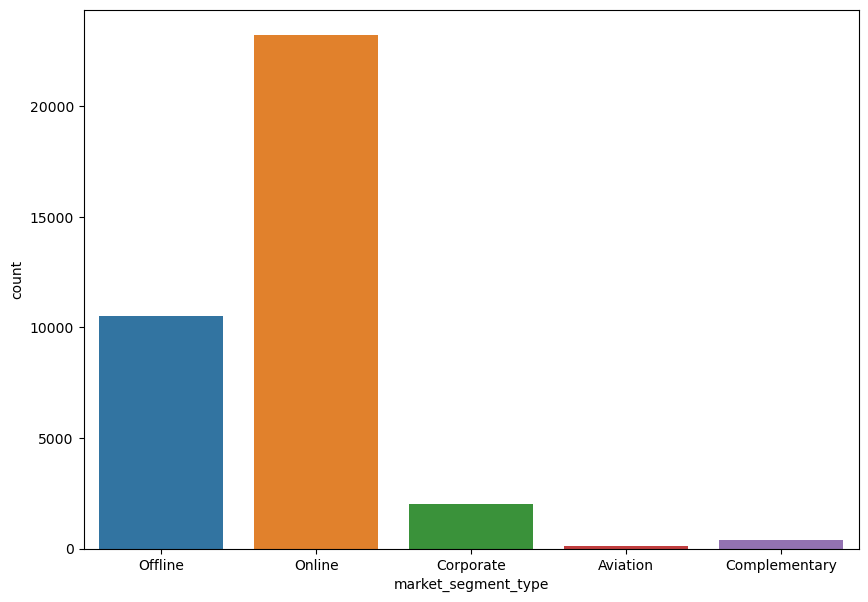

In [62]:
#2.	Which market segment do most of the guests come from?
plt.figure(figsize=(10, 7))
sns.countplot(data, x="market_segment_type", hue="market_segment_type")
plt.show()

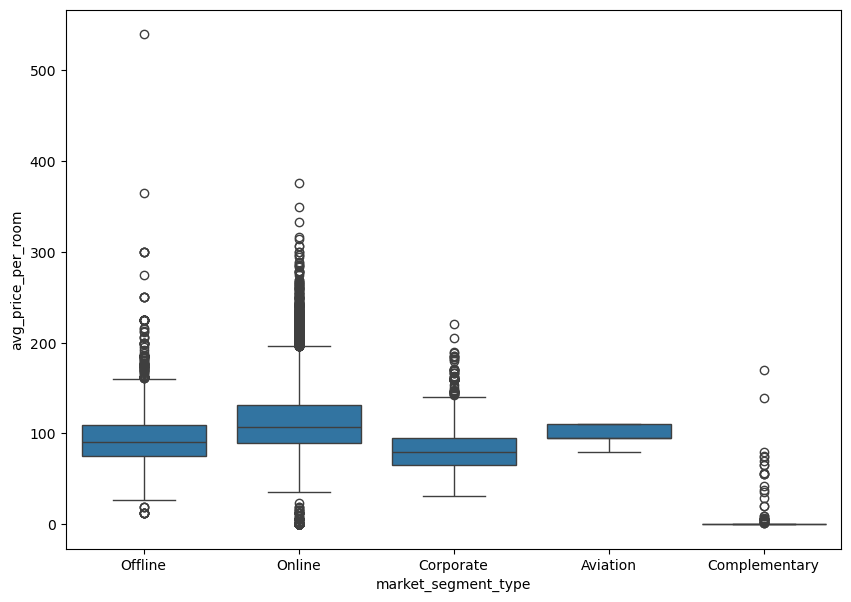

In [63]:
#3.	Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
plt.figure(figsize=(10, 7))
sns.boxplot(data, x="market_segment_type", y="avg_price_per_room")
plt.show()

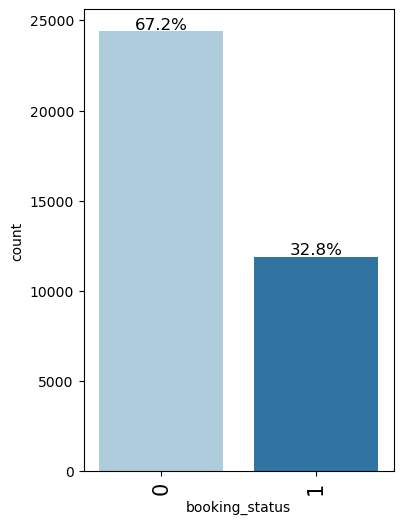

In [64]:
#4.	What percentage of bookings are canceled?
labeled_barplot(data,'booking_status', perc=True)

booking_status      0      1    All
repeated_guest                     
All             24390  11885  36275
0               23476  11869  35345
1                 914     16    930
------------------------------------------------------------------------------------------------------------------------


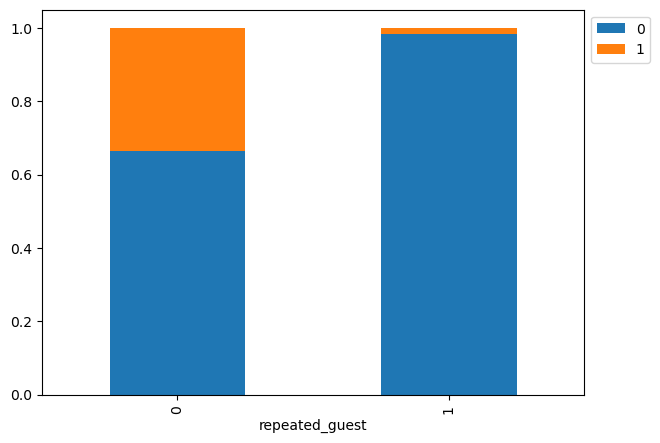

In [65]:
#5.	Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
stacked_barplot(data, "repeated_guest", "booking_status", perc=True)

booking_status              0      1    All
no_of_special_requests                     
All                     24390  11885  36275
0                       11232   8545  19777
1                        8670   2703  11373
2                        3727    637   4364
3                         675      0    675
4                          78      0     78
5                           8      0      8
------------------------------------------------------------------------------------------------------------------------


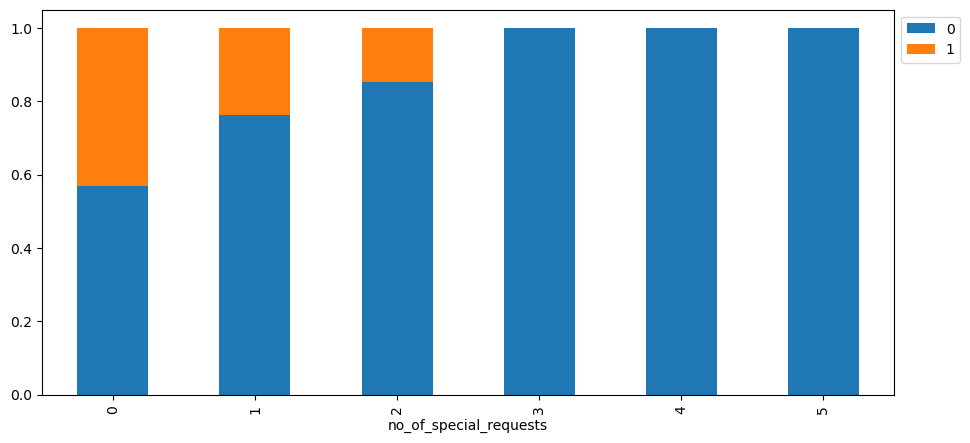

In [66]:
#6.	Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?
stacked_barplot(data, "no_of_special_requests", "booking_status")

## DATA PREPROCESSING

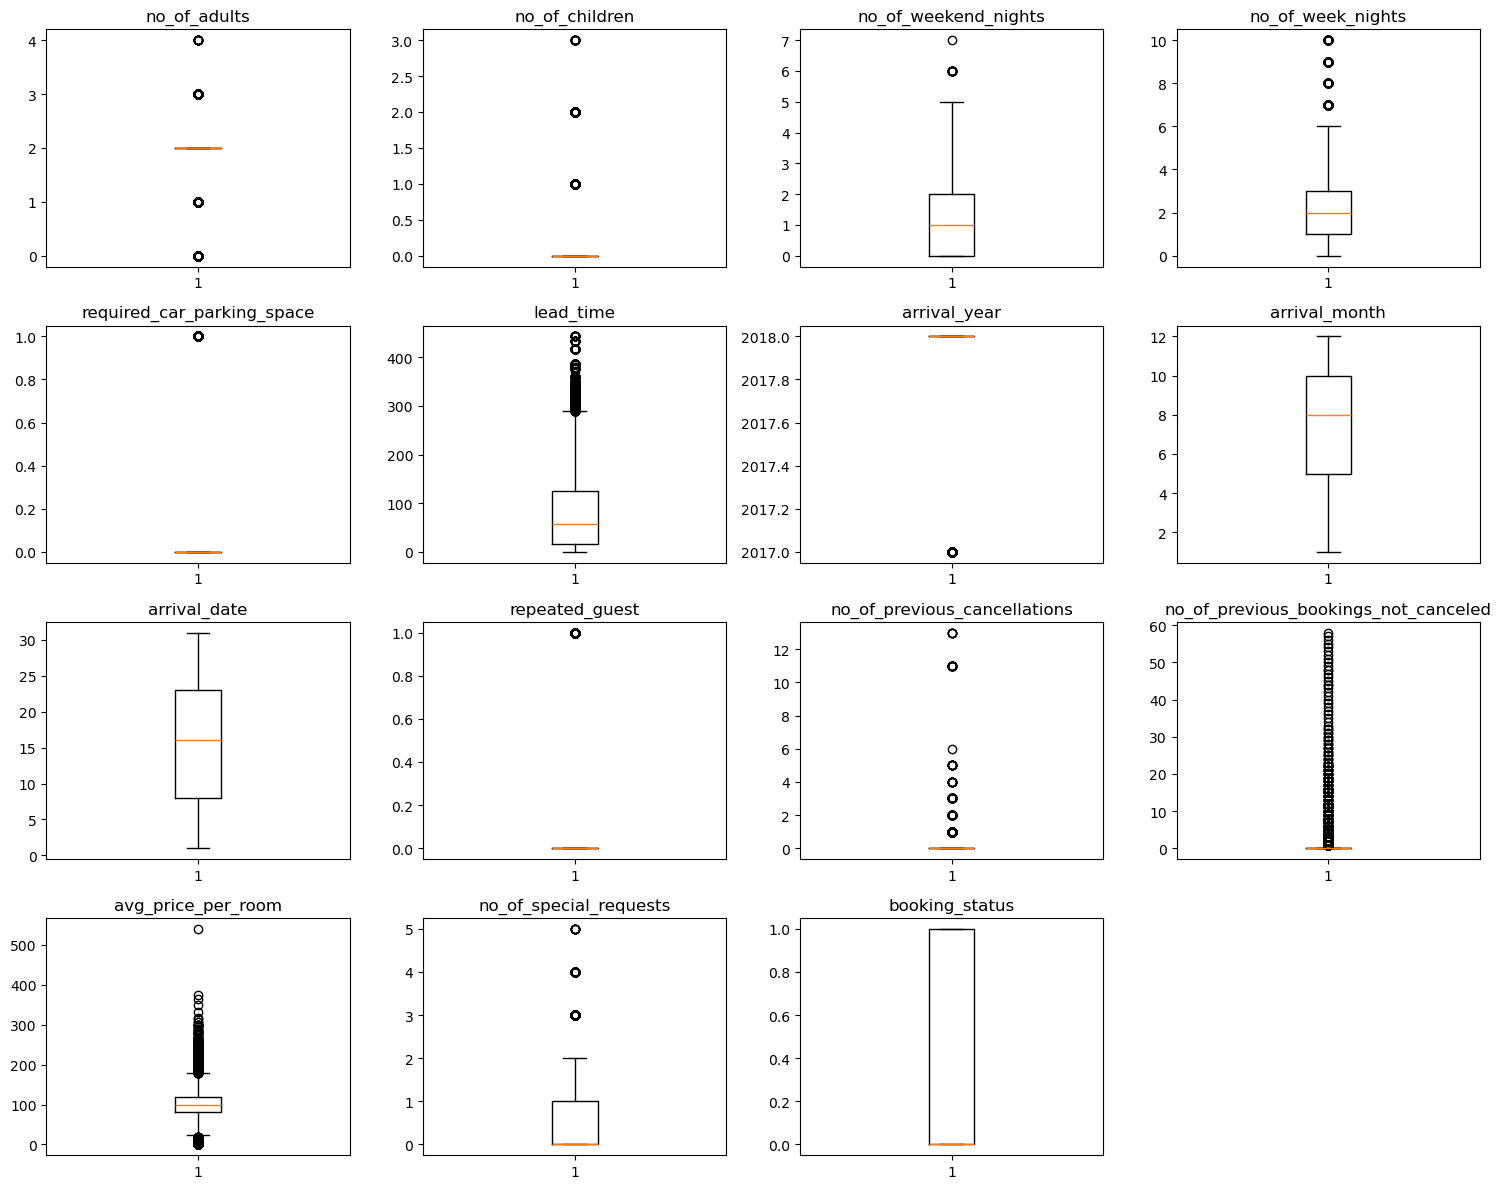

In [68]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [69]:
#Calculating the 25th quartile of the average room price
Q1 = data['avg_price_per_room'].quantile(0.25)

#Calculating the 75th quartile of the average room price
Q3 = data['avg_price_per_room'].quantile(0.75)

#IQR
IQR = Q3 - Q1

#Calculating the upper whisker
Upper_Whisker = Q3 + 1.5 * IQR
Upper_Whisker

179.55

In [70]:
#Assigning the outliers the value of upper whisker
data.loc[data["avg_price_per_room"] >= 500, "avg_price_per_room"] = Upper_Whisker

In [71]:
# Splitting the data
X = data.drop('booking_status',axis=1)
Y = data['booking_status']

X = pd.get_dummies(X, drop_first=True)
X = X.astype(float)
X = SM.add_constant(X)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

x_train.head()

,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
13662,1.0,1.0,0.0,0.0,1.0,0.0,163.0,2018.0,10.0,15.0,0.0,0.0,0.0,115.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
26641,1.0,2.0,0.0,0.0,3.0,0.0,113.0,2018.0,3.0,31.0,0.0,0.0,0.0,78.15,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
17835,1.0,2.0,0.0,2.0,3.0,0.0,359.0,2018.0,10.0,14.0,0.0,0.0,0.0,78.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
21485,1.0,2.0,0.0,0.0,3.0,0.0,136.0,2018.0,6.0,29.0,0.0,0.0,0.0,85.50,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5670,1.0,2.0,0.0,1.0,2.0,0.0,21.0,2018.0,8.0,15.0,0.0,0.0,0.0,151.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [72]:
y_train.head()

13662    1
26641    0
17835    0
21485    1
5670     1
Name: booking_status, dtype: int64

In [73]:
print("Shape of Training set : ", x_train.shape)
print("Shape of test set : ", x_test.shape)
print(' ')
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print(' ')
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 28)
Shape of test set :  (10883, 28)
 
Percentage of classes in training set:
booking_status
0    0.670644
1    0.329356
Name: proportion, dtype: float64
 
Percentage of classes in test set:
booking_status
0    0.676376
1    0.323624
Name: proportion, dtype: float64


In [74]:
# Scaling the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train_scaled = pd.DataFrame(sc.fit_transform(x_train), columns=x_train.columns)
x_test_scaled = pd.DataFrame(sc.transform(x_test), columns=x_test.columns)

In [75]:
x_train_scaled.head()

,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,0.0,-1.626886,-0.264796,-0.935888,-0.872352,-0.180712,0.901306,0.468611,0.837718,-0.068974,-0.161571,-0.064671,-0.087367,0.326358,-0.787158,-0.318531,-0.014034,-0.403283,-0.140712,-0.015374,-0.448038,-0.085436,-0.165757,-0.068329,-0.104444,-0.241928,1.568849,-1.338147
1,0.0,0.297368,-0.264796,-0.935888,0.580586,-0.180712,0.320355,0.468611,-1.440528,1.763011,-0.161571,-0.064671,-0.087367,-0.720706,0.481891,-0.318531,-0.014034,-0.403283,7.106692,-0.015374,-0.448038,-0.085436,-0.165757,-0.068329,-0.104444,-0.241928,-0.637410,0.747302
2,0.0,0.297368,-0.264796,1.354183,0.580586,-0.180712,3.178631,0.468611,0.837718,-0.183473,-0.161571,-0.064671,-0.087367,-0.724969,0.481891,-0.318531,-0.014034,-0.403283,-0.140712,-0.015374,-0.448038,-0.085436,-0.165757,-0.068329,-0.104444,-0.241928,1.568849,-1.338147
3,0.0,0.297368,-0.264796,-0.935888,0.580586,-0.180712,0.587593,0.468611,-0.464137,1.534013,-0.161571,-0.064671,-0.087367,-0.511862,-0.787158,-0.318531,-0.014034,2.479647,-0.140712,-0.015374,-0.448038,-0.085436,-0.165757,-0.068329,-0.104444,-0.241928,-0.637410,0.747302
4,0.0,0.297368,-0.264796,0.209148,-0.145883,-0.180712,-0.748593,0.468611,0.186790,-0.068974,-0.161571,-0.064671,-0.087367,1.349270,-0.787158,-0.318531,-0.014034,-0.403283,-0.140712,-0.015374,-0.448038,-0.085436,-0.165757,-0.068329,-0.104444,-0.241928,-0.637410,0.747302


## MODEL BUILDING

In [77]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [78]:
def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [79]:
logit = SM.Logit(y_train, x_train.astype(float))
lg = logit.fit(disp=False)
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25364
Method:                           MLE   Df Model:                           27
Date:                Sun, 24 Nov 2024   Pseudo R-squ.:                  0.3291
Time:                        04:39:10   Log-Likelihood:                -10796.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -923.0667    120.844     -7.639      0.000   -1159.916    -686.217
no_of_adults                             0.1132      

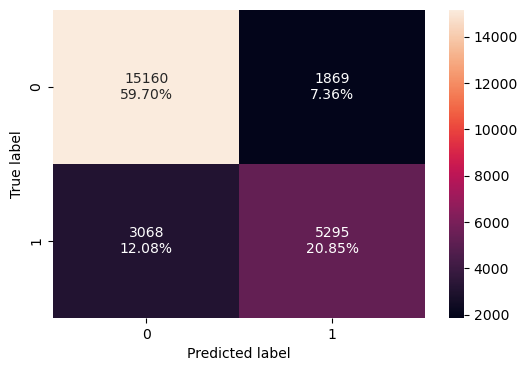

In [80]:
confusion_matrix_statsmodels(lg, x_train, y_train)

In [81]:
print("Training performance model 1:")
logistic_reg_perf_train = model_performance_classification_statsmodels(lg, x_train, y_train)
logistic_reg_perf_train

Training performance model 1:


,Accuracy,Recall,Precision,F1
0,0.805569,0.633146,0.739112,0.682038


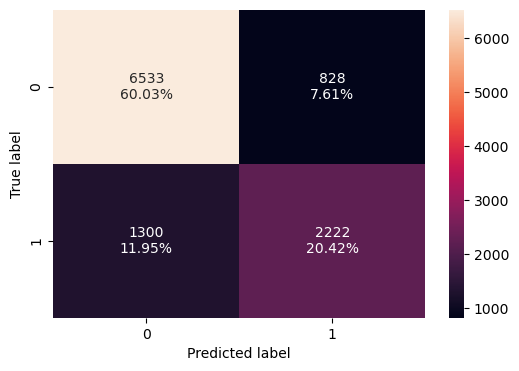

In [82]:
confusion_matrix_statsmodels(lg, x_test, y_test)

In [83]:
print("Testing performance model 1:")
logistic_reg_perf_test=model_performance_classification_statsmodels(lg, x_test, y_test)
logistic_reg_perf_test

Testing performance model 1:


,Accuracy,Recall,Precision,F1
0,0.804466,0.630892,0.728525,0.676202


In [84]:
#Build Naive Bayes Model
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)

GaussianNB()

In [85]:
nb_perf_train = model_performance_classification_statsmodels(
    nb_model, x_train, y_train)
nb_perf_train

,Accuracy,Recall,Precision,F1
0,0.413004,0.962573,0.355534,0.519271


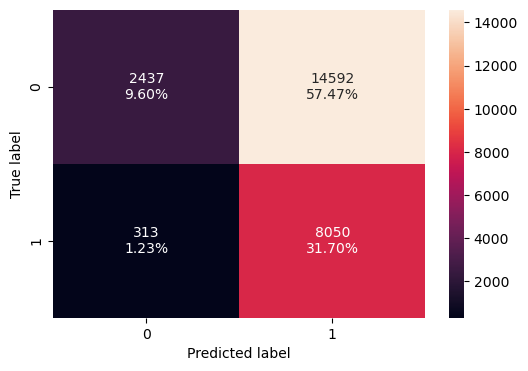

In [86]:
confusion_matrix_statsmodels(nb_model, x_train, y_train)

In [87]:
# NB check on test data
nb_perf_test = model_performance_classification_statsmodels(
    nb_model, x_test, y_test
)
nb_perf_test

,Accuracy,Recall,Precision,F1
0,0.409446,0.966212,0.350427,0.51432


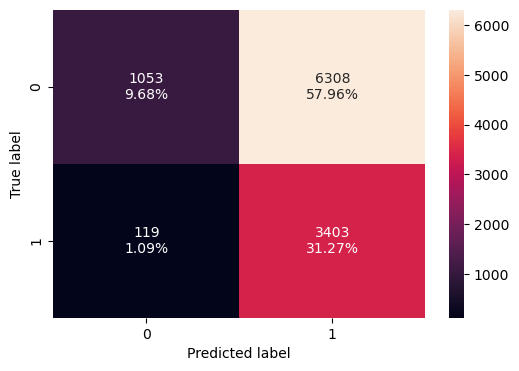

In [186]:
confusion_matrix_statsmodels(nb_model, x_test, y_test)

In [88]:
#Build KNN Model
knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [89]:
knn_perf_train = model_performance_classification_statsmodels(
    knn_model, x_train, y_train
)
knn_perf_train

,Accuracy,Recall,Precision,F1
0,0.894534,0.801148,0.868438,0.833437


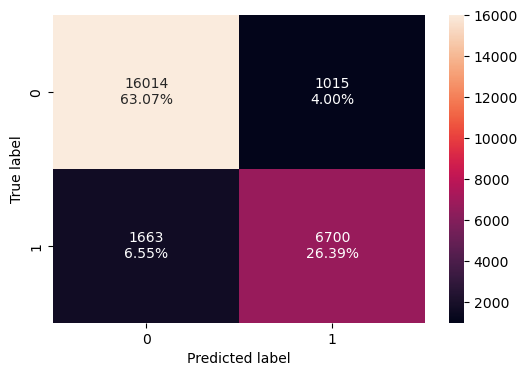

In [90]:
confusion_matrix_statsmodels(knn_model, x_train, y_train)

In [91]:
knn_perf_test = model_performance_classification_statsmodels(
    knn_model, x_test, y_test
)
knn_perf_test

,Accuracy,Recall,Precision,F1
0,0.803731,0.656445,0.714021,0.684024


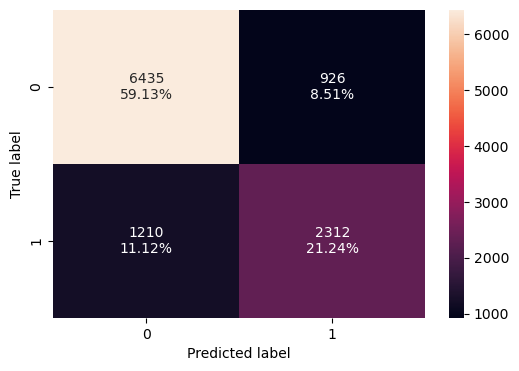

In [92]:
confusion_matrix_statsmodels(knn_model, x_test, y_test)

In [93]:
# Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [94]:
decision_tree_perf_train = model_performance_classification_statsmodels(
    dt_model, x_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,0.994211,0.986608,0.995776,0.991171


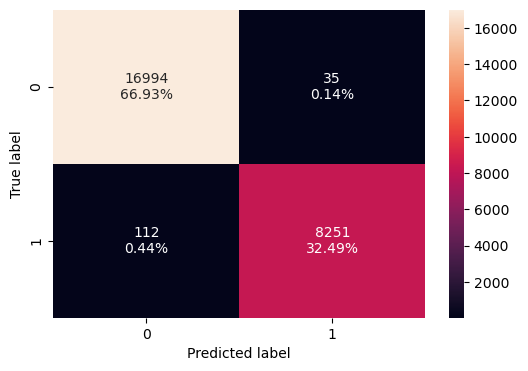

In [95]:
confusion_matrix_statsmodels(dt_model, x_train, y_train)

In [178]:
decision_tree_perf_test = model_performance_classification_statsmodels(
    dt_model, x_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.874575,0.81573,0.800502,0.808044


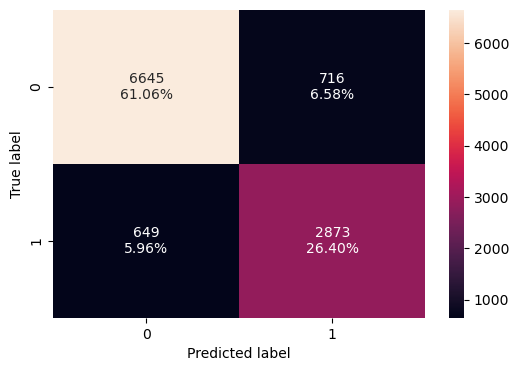

In [97]:
confusion_matrix_statsmodels(dt_model, x_test, y_test)

## Model Performance Improvement

In [99]:
#Checking for multicollinearity using VIF
def calculate_vif(x):
    vif = pd.DataFrame()
    vif["Features"] = x.columns
    vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    return vif
vif_before = calculate_vif(x_train)
print("VIF before removing variables:\n", vif_before)

VIF before removing variables:
                                 Features           VIF
0                                  const  3.949715e+07
1                           no_of_adults  1.351687e+00
2                         no_of_children  2.093822e+00
3                   no_of_weekend_nights  1.064593e+00
4                      no_of_week_nights  1.094952e+00
5             required_car_parking_space  1.040029e+00
6                              lead_time  1.396352e+00
7                           arrival_year  1.431885e+00
8                          arrival_month  1.276429e+00
9                           arrival_date  1.006800e+00
10                        repeated_guest  1.783609e+00
11          no_of_previous_cancellations  1.395697e+00
12  no_of_previous_bookings_not_canceled  1.652030e+00
13                    avg_price_per_room  2.069221e+00
14                no_of_special_requests  1.248047e+00
15         type_of_meal_plan_Meal Plan 2  1.273520e+00
16         type_of_meal_plan_Meal

In [100]:
vif_before = calculate_vif(x_train)[calculate_vif(x_train)["VIF"] > 5]
vif_before

,Features,VIF
0,const,3.949715e+07
25,market_segment_type_Corporate,1.693060e+01
26,market_segment_type_Offline,6.411907e+01
27,market_segment_type_Online,7.118319e+01


In [101]:
col_drop = "market_segment_type_Online" #dropping the column with highest VIF
x_train1 = x_train.loc[:, ~x_train.columns.str.startswith(col_drop)]
x_test1 = x_test.loc[:, ~x_test.columns.str.startswith(col_drop)]

# Checking VIF after dropping
vif_after = calculate_vif(x_train1)
print("VIF after dropping ", col_drop)
vif_after

VIF after dropping  market_segment_type_Online


,Features,VIF
0,const,3.941982e+07
1,no_of_adults,1.335188e+00
2,no_of_children,2.092788e+00
3,no_of_weekend_nights,1.064145e+00
4,no_of_week_nights,1.094357e+00
5,required_car_parking_space,1.039894e+00
6,lead_time,1.392042e+00
7,arrival_year,1.429413e+00
8,arrival_month,1.275381e+00
9,arrival_date,1.006782e+00


In [102]:
# initial list of columns
cols = x_train.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = x_train[cols]

    # fitting the model
    model = SM.Logit(y_train, x_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline']


In [103]:
x_train1 = x_train[selected_features]
x_test1 = x_test[selected_features]

In [104]:
# Fitting the lg1 model
logit1 = SM.Logit(y_train, x_train1.astype(float))
lg1 = logit1.fit()

print(lg1.summary())

Optimization terminated successfully.
         Current function value: 0.425801
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25370
Method:                           MLE   Df Model:                           21
Date:                Sun, 24 Nov 2024   Pseudo R-squ.:                  0.3281
Time:                        04:39:42   Log-Likelihood:                -10812.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -915.9372    120.481     -7.602    

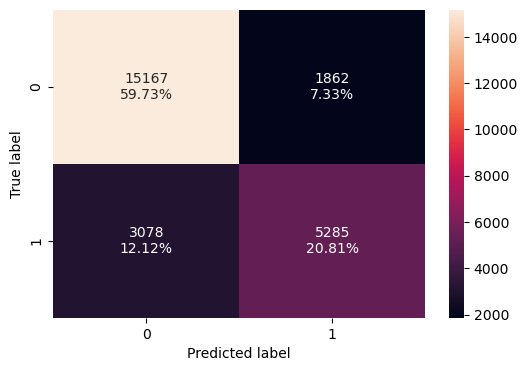

In [105]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, x_train1, y_train)

In [106]:
print("Training performance:")
log_reg_model_train_perf = model_performance_classification_statsmodels(lg1, x_train1, y_train)
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.805451,0.63195,0.739471,0.681496


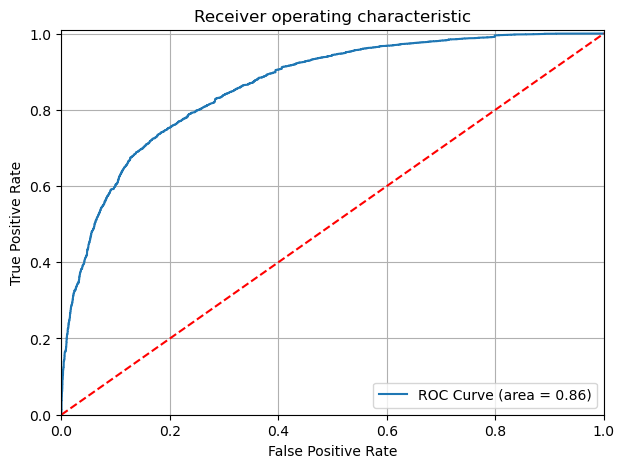

In [107]:
# Plotting ROC Curve
logit_roc_auc_train = roc_auc_score(y_train, lg1.predict(x_train1))
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(x_train1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="ROC Curve (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [108]:
# Finding the optimal threshold
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(x_train1))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.3644480024839582


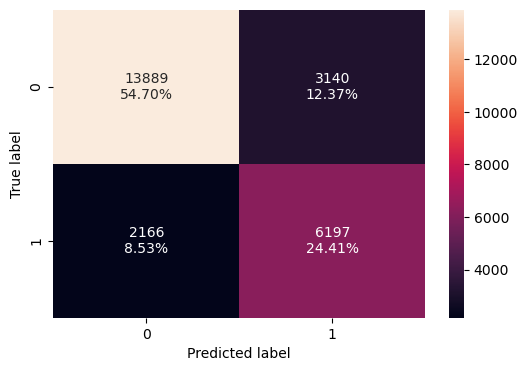

In [109]:
# creating the confusion matrix for xtrain1 and y_train with optimal_threshold_auc_roc as threshold
confusion_matrix_statsmodels(lg1, x_train1, y_train, threshold=optimal_threshold_auc_roc) 

In [110]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(lg1, x_train1, y_train, threshold=optimal_threshold_auc_roc)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.791037,0.741002,0.663704,0.700226


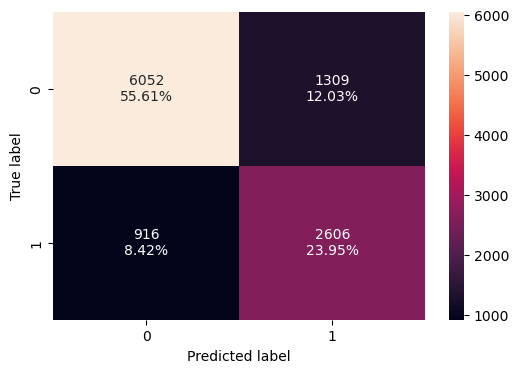

In [111]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, x_test1, y_test, threshold=0.37)

In [112]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, x_test1, y_test, threshold=optimal_threshold_auc_roc)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


,Accuracy,Recall,Precision,F1
0,0.794909,0.745031,0.662961,0.701604


In [113]:
# KNN Classifier Performance Improvement using different k values
# Define the range for k values
k_values = range(2, 21)

# Initialize variables to store the best k and the highest recall score
best_k = 0
best_recall = 0

# Loop through each k value
for k in k_values:
    # Create and fit the KNN classifier with the current k value
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)

    # Predict on the test set
    y_pred = knn.predict(x_test)

    # Calculate the recall score
    recall = recall_score(y_test, y_pred)

    # Print the recall score for the current k value
    print(f'Recall for k={k}: {recall}')

    # Update the best k and best recall score if the current recall is higher
    if recall > best_recall:
        best_recall = recall
        best_k = k

# Print the best k value and its recall score
print(f'\nThe best value of k is: {best_k} with a recall of: {best_recall}')

Recall for k=2: 0.5706984667802385
Recall for k=3: 0.6564452015900056
Recall for k=4: 0.5752413401476434
Recall for k=5: 0.629755820556502
Recall for k=6: 0.565587734241908
Recall for k=7: 0.6047700170357752
Recall for k=8: 0.5496876774559909
Recall for k=9: 0.5885860306643952
Recall for k=10: 0.5485519591141397
Recall for k=11: 0.5789324247586598
Recall for k=12: 0.5448608745031233
Recall for k=13: 0.5701306076093129
Recall for k=14: 0.5371947756956275
Recall for k=15: 0.5599091425326519
Recall for k=16: 0.5289608177172062
Recall for k=17: 0.5547984099943214
Recall for k=18: 0.5315161839863713
Recall for k=19: 0.5479840999432141
Recall for k=20: 0.5329358319136854

The best value of k is: 3 with a recall of: 0.6564452015900056


In [114]:
knn_tuned = KNeighborsClassifier(n_neighbors=best_k)
knn_tuned.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [115]:
knn_tuned_perf_train = model_performance_classification_statsmodels(
    knn_tuned, x_train, y_train
)
knn_tuned_perf_train

,Accuracy,Recall,Precision,F1
0,0.894534,0.801148,0.868438,0.833437


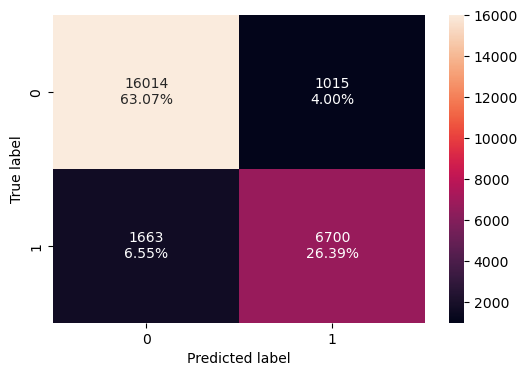

In [116]:
confusion_matrix_statsmodels(knn_tuned, x_train, y_train)

In [117]:
knn_tuned_perf_test = model_performance_classification_statsmodels(
    knn_tuned, x_test, y_test
)
knn_tuned_perf_test

,Accuracy,Recall,Precision,F1
0,0.803731,0.656445,0.714021,0.684024


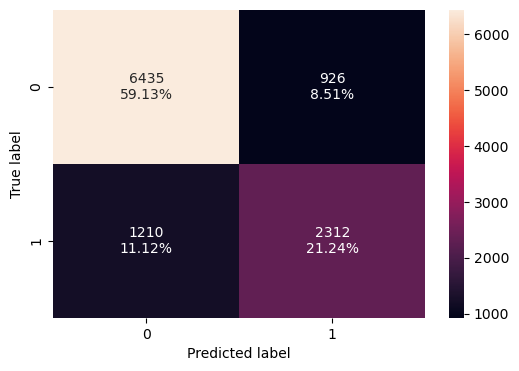

In [188]:
confusion_matrix_statsmodels(knn_tuned, x_test, y_test)

In [130]:
# Improving Decision Tree Model
# Pre-Pruning
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight="balanced")

# Grid of parameters to choose from
parameters = {"max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70]}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, max_leaf_nodes=50,
                       min_samples_split=10, random_state=1)

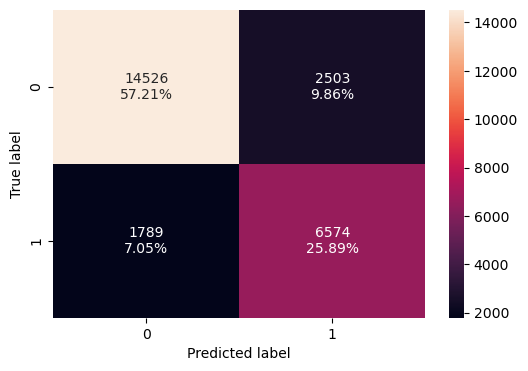

In [131]:
# Checking performance on training data
confusion_matrix_statsmodels(estimator, x_train, y_train)

In [132]:
decision_tree_tune_perf_train = model_performance_classification_statsmodels(estimator, x_train, y_train)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.83097,0.786082,0.724248,0.753899


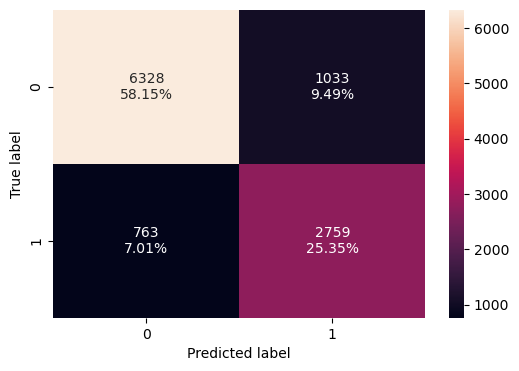

In [133]:
# Checking performance on test data
confusion_matrix_statsmodels(estimator, x_test, y_test)

In [134]:
decision_tree_tune_perf_test = model_performance_classification_statsmodels(estimator, x_test, y_test)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.834972,0.783362,0.727584,0.754444


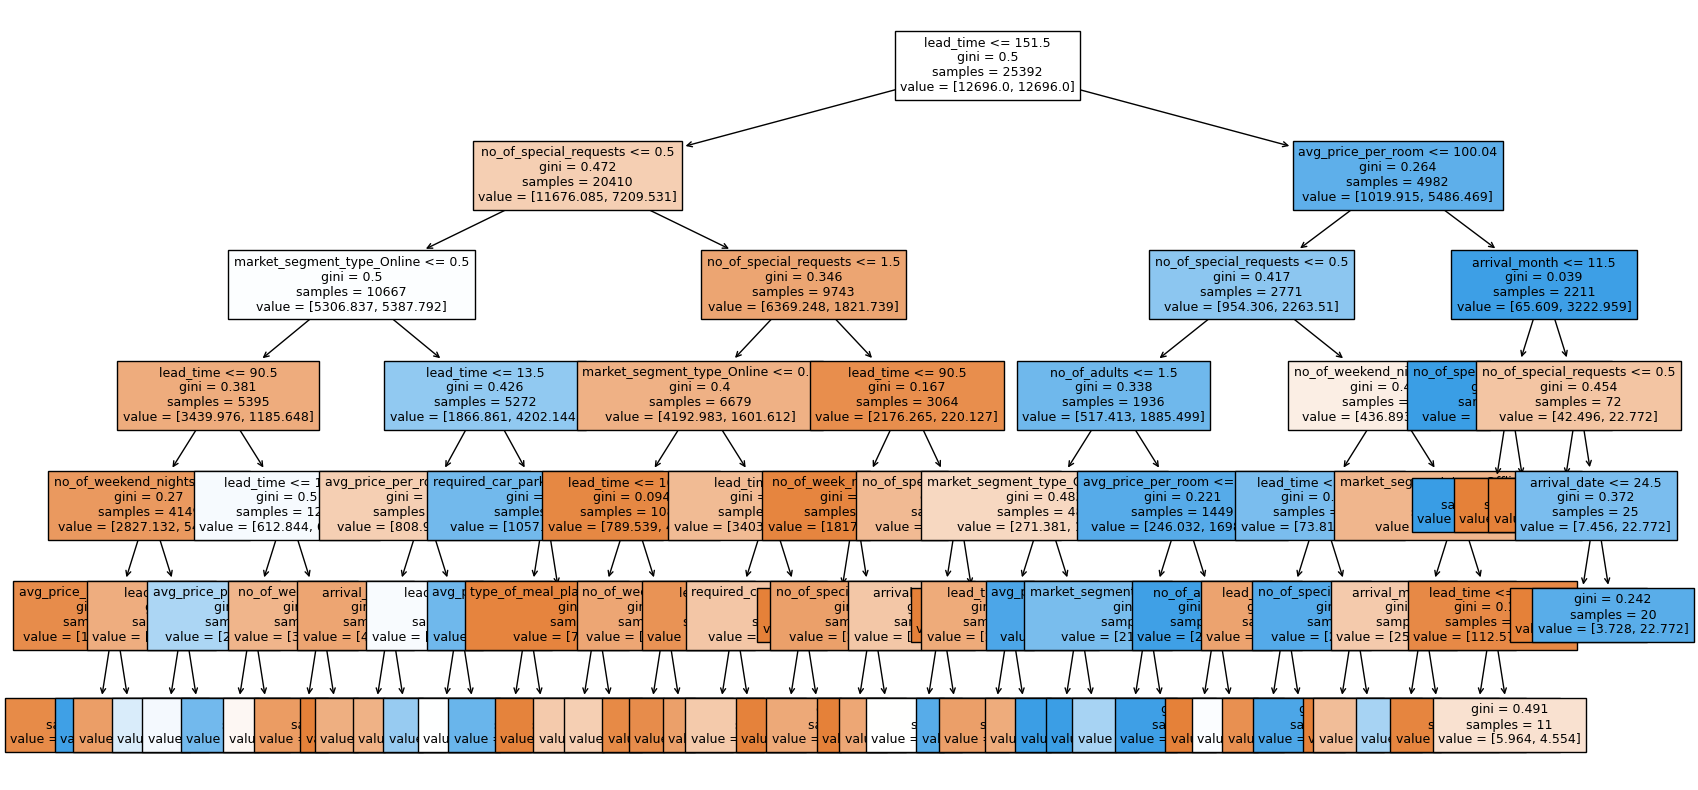

In [140]:
# Visualising the Decision Tree
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=x_train.columns.tolist(),
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

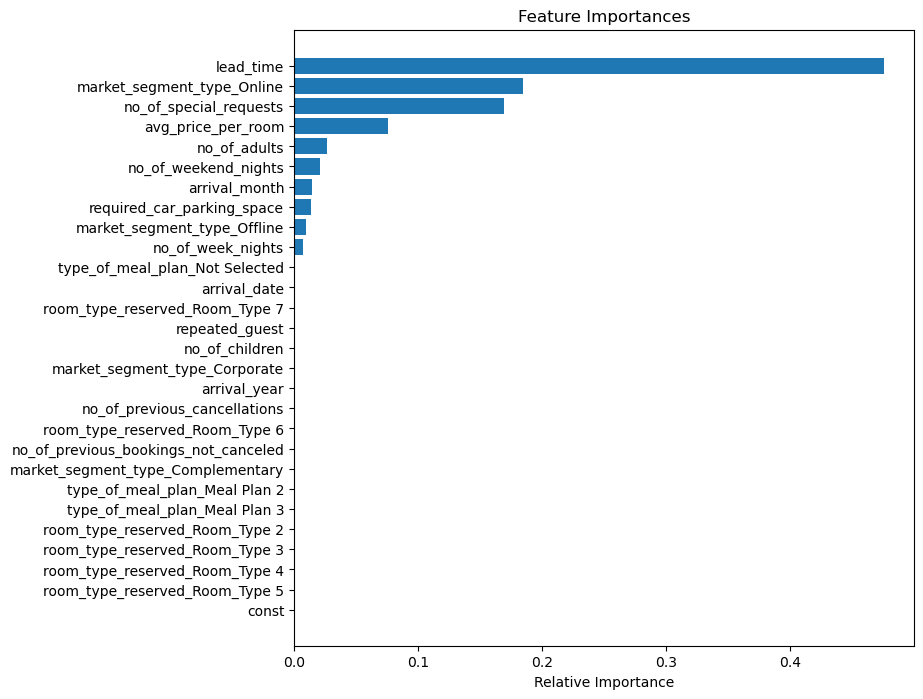

In [144]:
# importance of features in the tree building

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [x_train.columns.tolist()[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [146]:
# Post Pruning
# Cost Complexity Pruning
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [148]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000e+00,0.008376
1,0.000000e+00,0.008376
2,2.933821e-20,0.008376
3,2.933821e-20,0.008376
4,2.933821e-20,0.008376
...,...,...
1842,8.901596e-03,0.328058
1843,9.802243e-03,0.337860
1844,1.271875e-02,0.350579
1845,3.412090e-02,0.418821


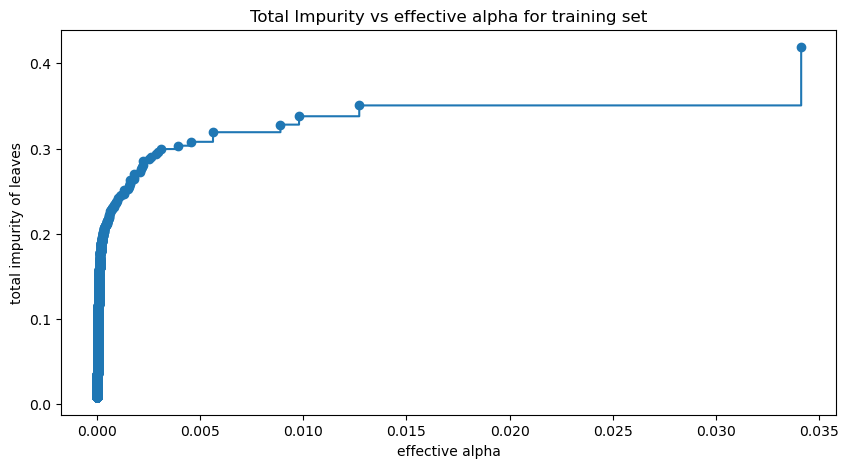

In [150]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [152]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(x_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.08117914389136954


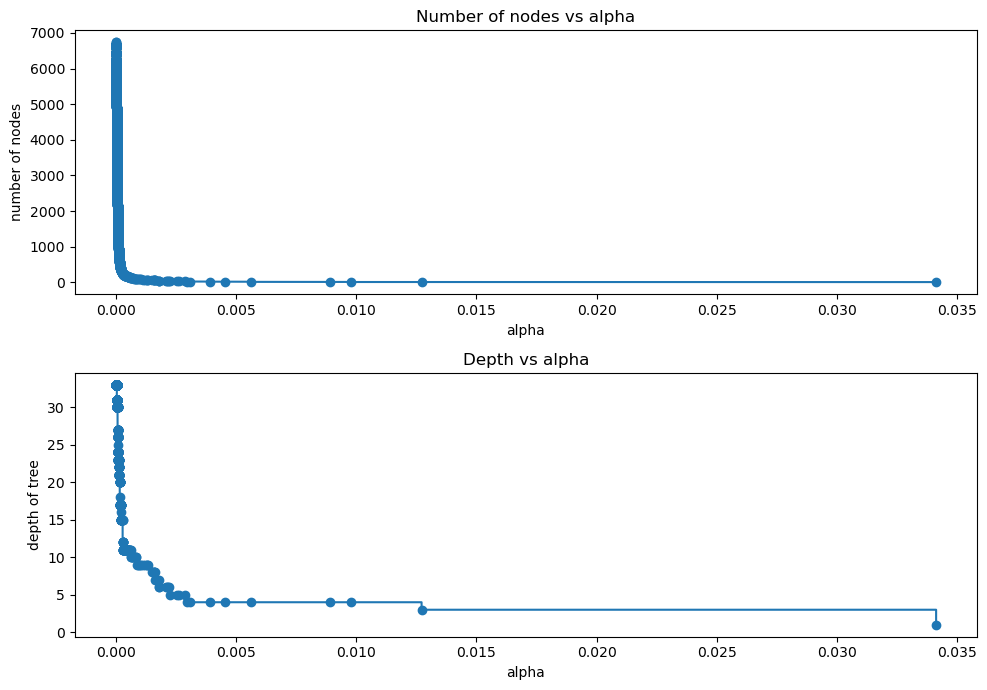

In [153]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [154]:
# F1 score vs Alpha
f1_train = []
for clf in clfs:
    pred_train = clf.predict(x_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

f1_test = []
for clf in clfs:
    pred_test = clf.predict(x_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

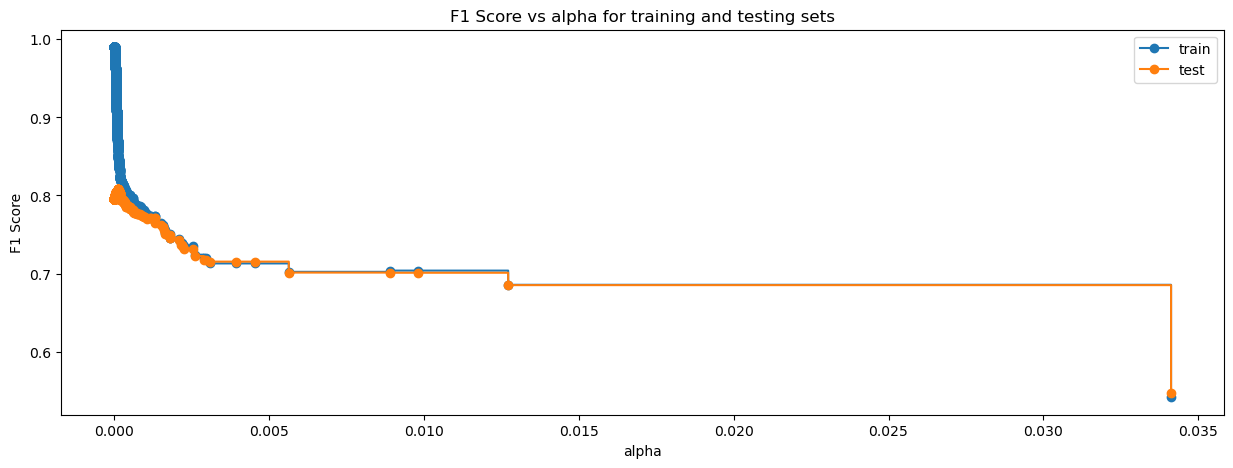

In [155]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [156]:
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.00012267633155167015,
                       class_weight='balanced', random_state=1)


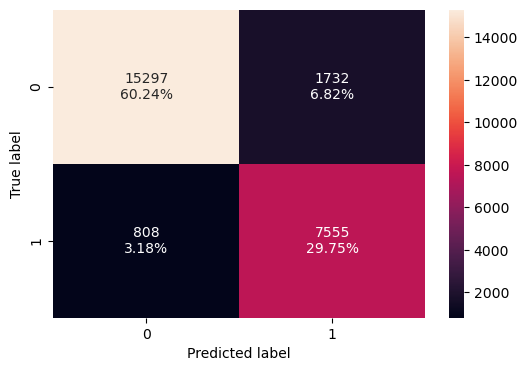

In [157]:
# Checking performance on training data
confusion_matrix_statsmodels(best_model, x_train, y_train)

In [158]:
decision_tree_post_perf_train = model_performance_classification_statsmodels(
    best_model, x_train, y_train)
decision_tree_post_perf_train

,Accuracy,Recall,Precision,F1
0,0.899968,0.903384,0.813503,0.856091


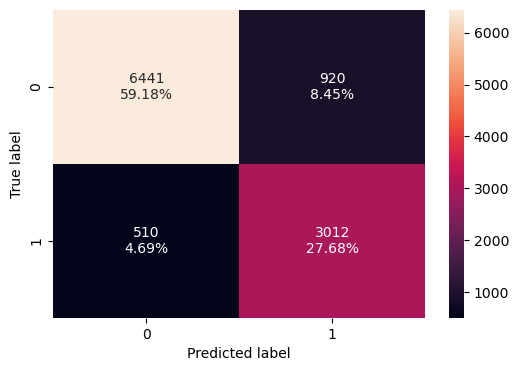

In [159]:
# Checking performance on test data
confusion_matrix_statsmodels(best_model, x_test, y_test)

In [160]:
decision_tree_post_test = model_performance_classification_statsmodels(
    best_model, x_test, y_test)
decision_tree_post_test

,Accuracy,Recall,Precision,F1
0,0.868602,0.855196,0.766022,0.808157


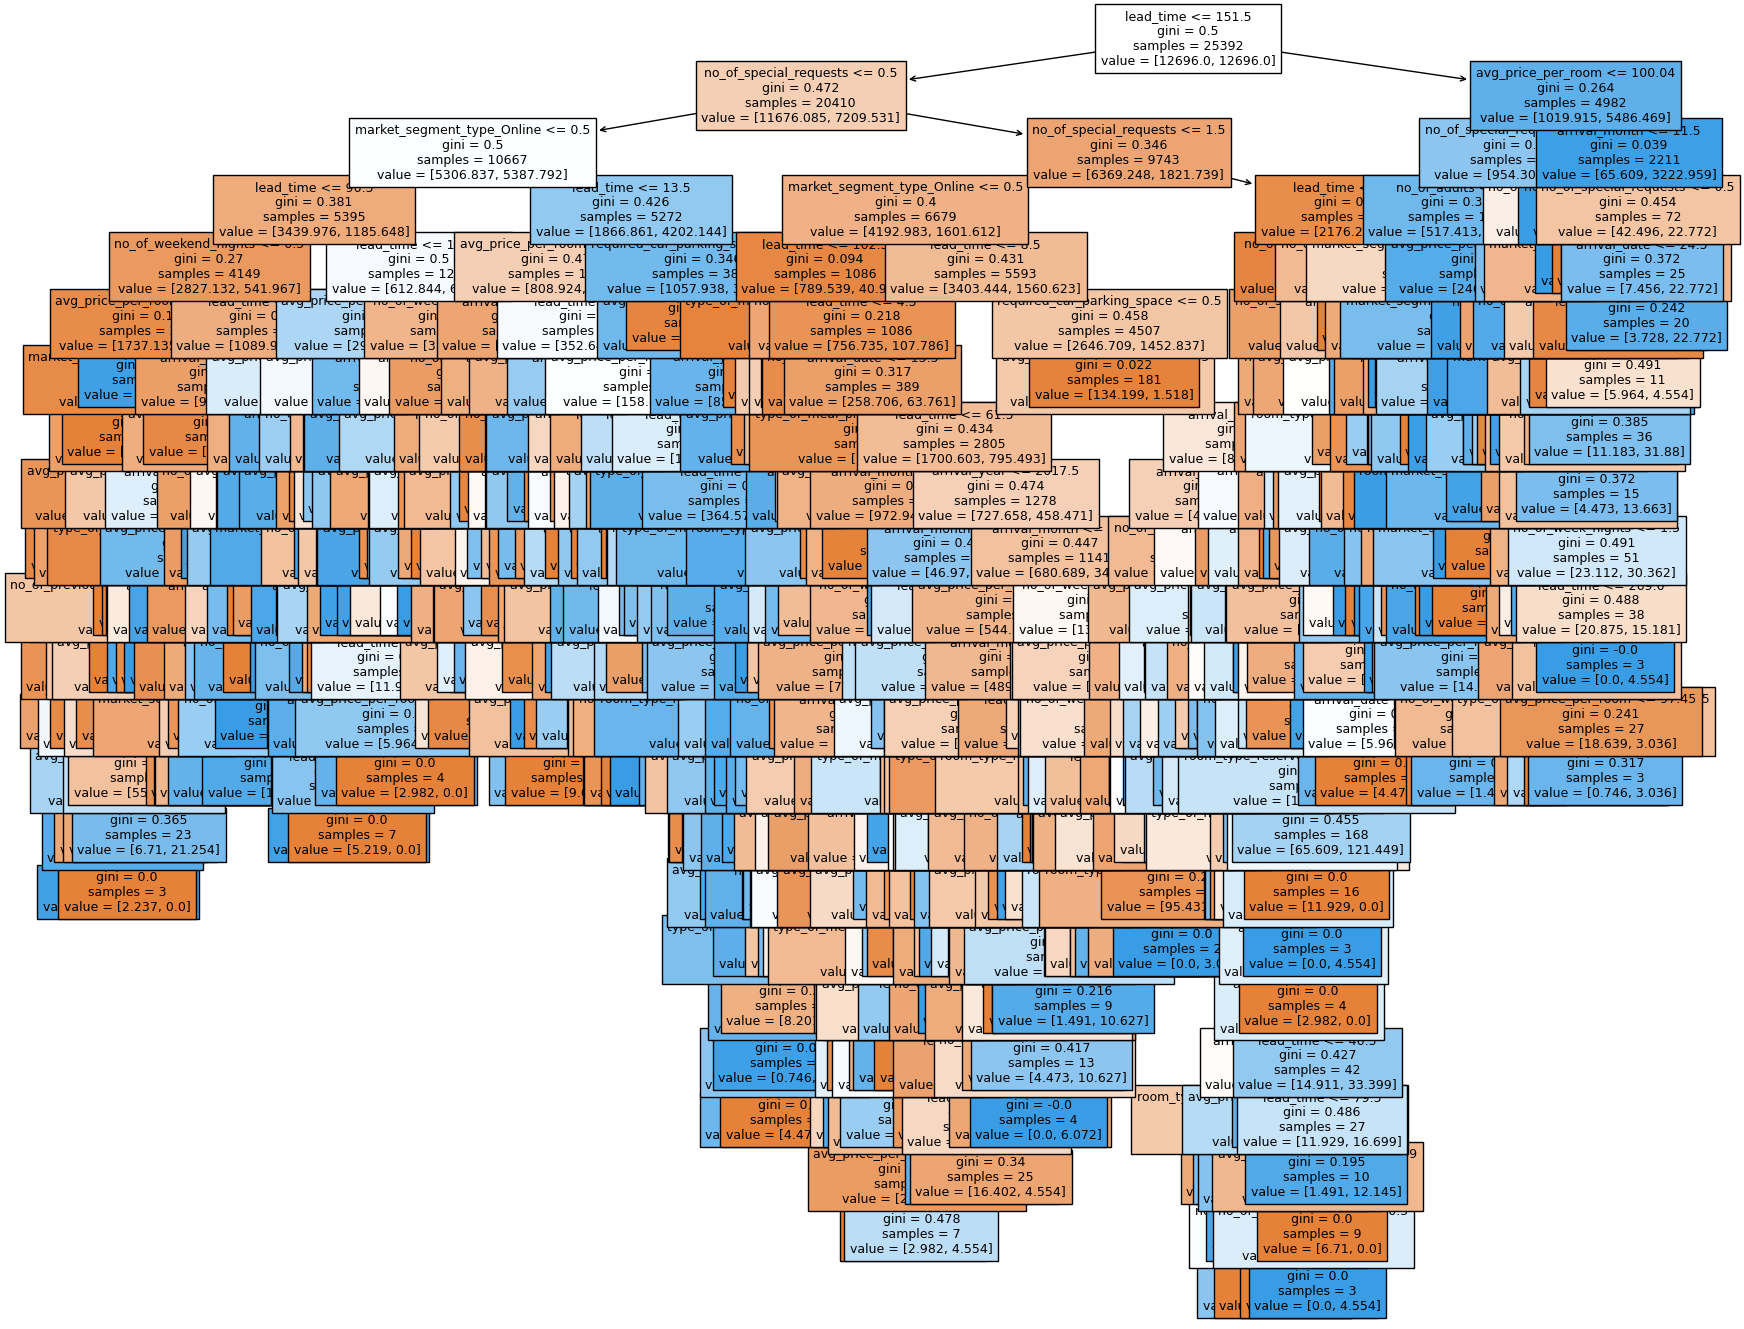

In [166]:
 #show the decision tree
plt.figure(figsize=(20, 17))

out = tree.plot_tree(
    best_model,
    feature_names=x_train.columns.tolist(),
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [168]:
# Text report showing the rules of a decision tree
print(tree.export_text(best_model, feature_names=x_train.columns.tolist(), show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 68.50
|   |   |   |   |   |   |   |   |   |--- weights: [207.26, 10.63] class: 0
|   |   |   |   |   |   |   |   |--- avg_price_per_room >  68.50
|   |   |   |   |   |   |   |   |   |--- arrival_date <= 29.50
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- arrival_date >  29.50
|   |   |   |

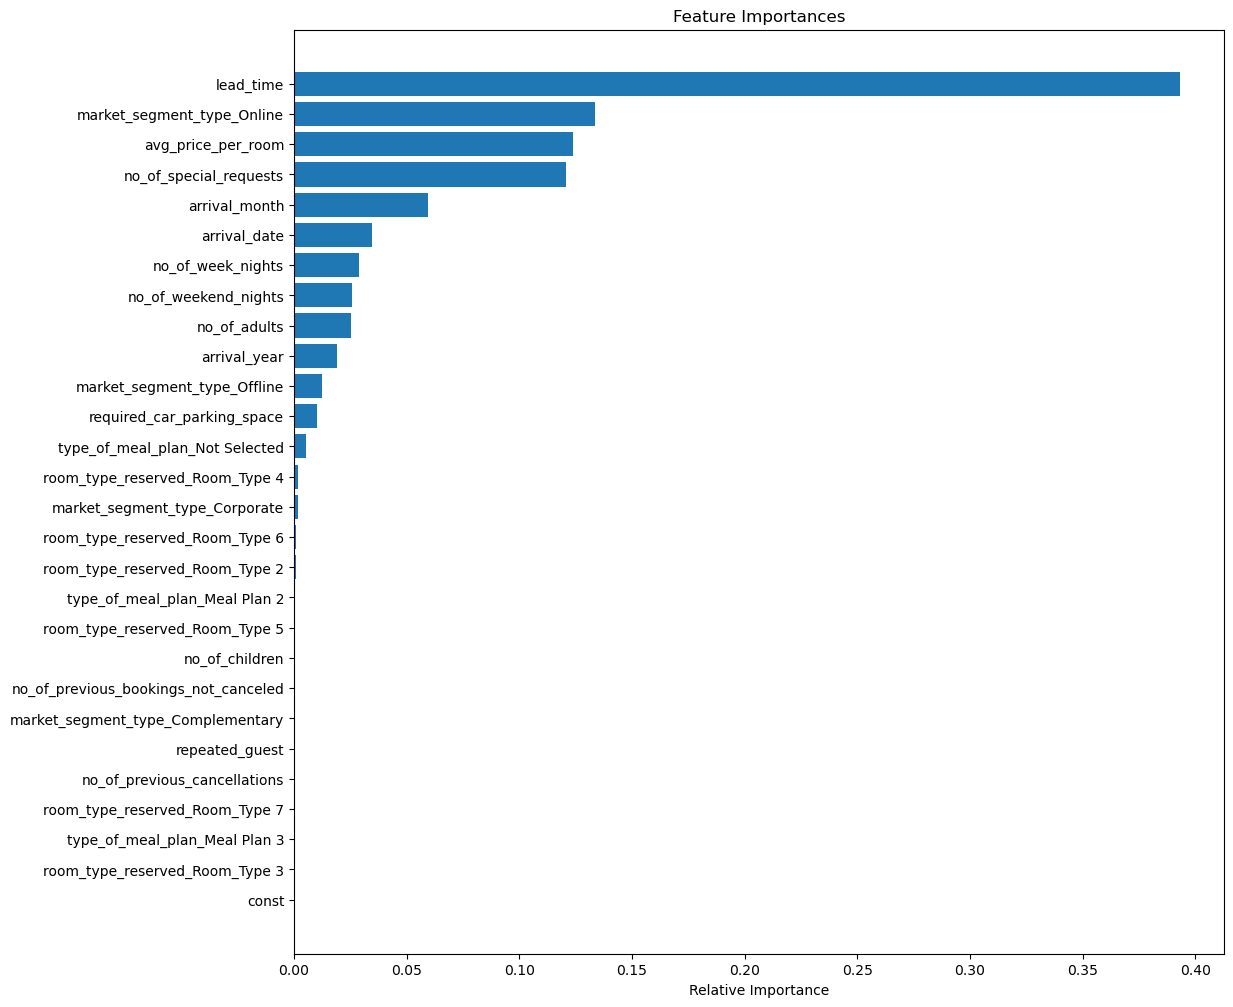

In [170]:
importances = best_model.feature_importances_ #displaying feature importance graph
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [x_train.columns.tolist()[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## MODEL PERFORMANCE COMPARISON

In [184]:
# training performance comparison

models_train_comp_df = pd.concat(
    [logistic_reg_perf_train.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        nb_perf_train.T,
        knn_perf_train.T,
        knn_tuned_perf_train.T,
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = ["Logistic Regression Base",
    "Logistic Regression Tuned",
    "Naive Bayes Base",
    "KNN Base",
    "KNN Tuned",
    "Decision Tree Base",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression Base,Logistic Regression Tuned,Naive Bayes Base,KNN Base,KNN Tuned,Decision Tree Base,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.805569,0.791037,0.413004,0.894534,0.894534,0.994211,0.830970,0.899968
Recall,0.633146,0.741002,0.962573,0.801148,0.801148,0.986608,0.786082,0.903384
Precision,0.739112,0.663704,0.355534,0.868438,0.868438,0.995776,0.724248,0.813503
F1,0.682038,0.700226,0.519271,0.833437,0.833437,0.991171,0.753899,0.856091


In [182]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [logistic_reg_perf_test.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        nb_perf_test.T,
        knn_perf_test.T,
        knn_tuned_perf_test.T,
       decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = ["Logistic Regression Base",
    "Logistic Regression Tuned",
    "Naive Bayes Base",
    "KNN Base",
    "KNN Tuned",
    "Decision Tree Base",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Logistic Regression Base,Logistic Regression Tuned,Naive Bayes Base,KNN Base,KNN Tuned,Decision Tree Base,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.804466,0.794909,0.409446,0.803731,0.803731,0.874575,0.834972,0.868602
Recall,0.630892,0.745031,0.966212,0.656445,0.656445,0.815730,0.783362,0.855196
Precision,0.728525,0.662961,0.350427,0.714021,0.714021,0.800502,0.727584,0.766022
F1,0.676202,0.701604,0.514320,0.684024,0.684024,0.808044,0.754444,0.808157
